# Data Import and Explory

## Import data

In [1]:
import pandas as pd
import glob

# Define a function to read and merge all CSV files in the specified folder
def read_and_combine_csv(folder_path):
     # Use the glob module to find all csv files in the folder
     file_paths = glob.glob(folder_path + "/*.csv")
     # Use pandas to read a list of csv files and merge them into a single DataFrame
     combined_df = pd.concat((pd.read_csv(f) for f in file_paths), ignore_index=True)
     return combined_df

# Set the folder paths for the data of 2013, 2014, and 2015 respectively.
folder_path_2013 = './2013'
folder_path_2014 = './2014'
folder_path_2015 = './2015'

# Call the function and create the corresponding DataFrame
df_2013 = read_and_combine_csv(folder_path_2013)
df_2014 = read_and_combine_csv(folder_path_2014)
df_2015 = read_and_combine_csv(folder_path_2015)

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\452233452.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(f) for f in file_paths), ignore_index=True)


## Missing Values

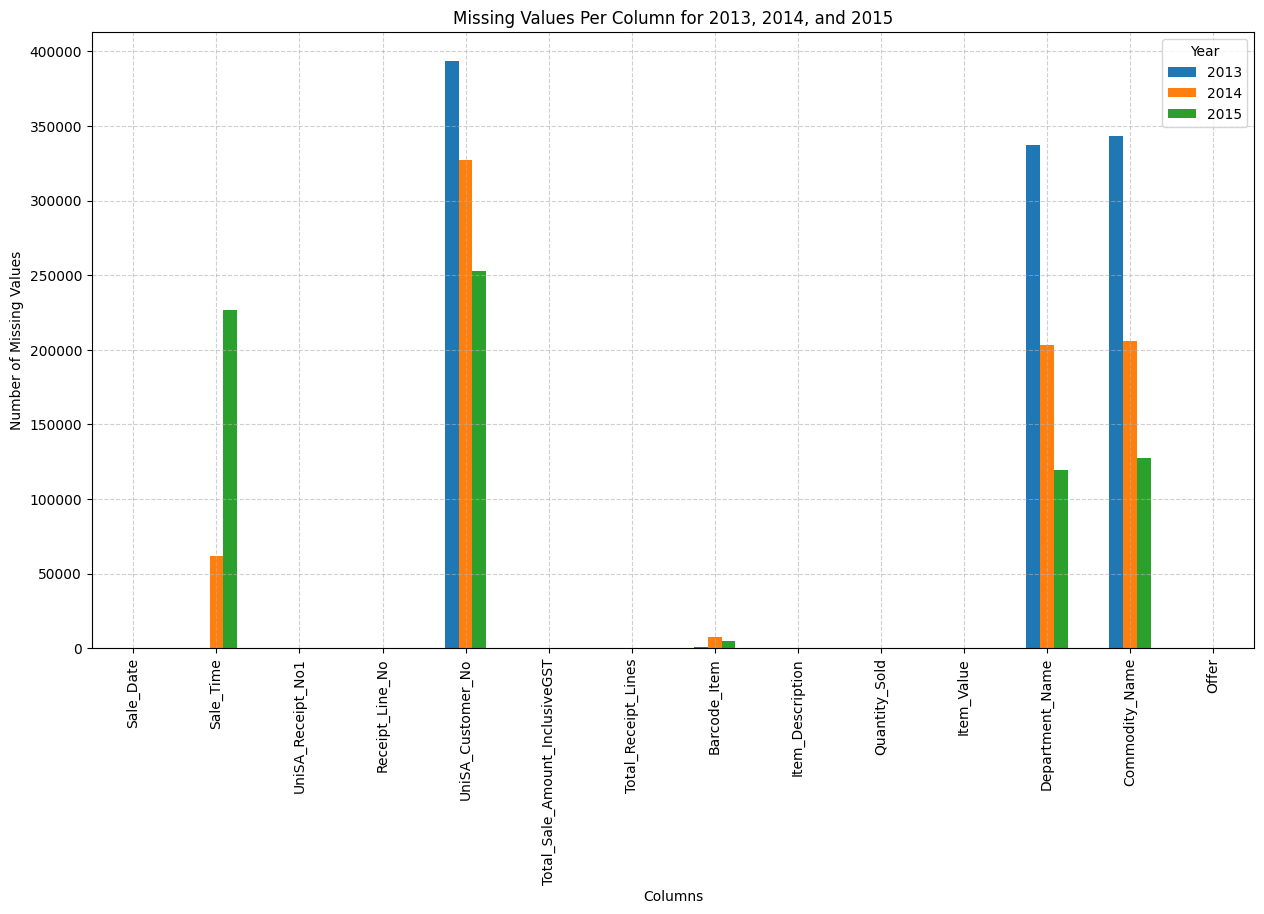

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_all_missing_values(df_2013, df_2014, df_2015):
     # Count the number of missing values in each column of each DataFrame
     missing_2013 = df_2013.isnull().sum()
     missing_2014 = df_2014.isnull().sum()
     missing_2015 = df_2015.isnull().sum()

     #Create a new DataFrame to store this data
     missing_df = pd.DataFrame({
         '2013': missing_2013,
         '2014': missing_2014,
         '2015': missing_2015
     })

     # Fill missing values with 0 to ensure that even columns without missing values are displayed
     missing_df = missing_df.fillna(0)

     # Draw a bar chart
     missing_df.plot(kind='bar', figsize=(15, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
     plt.title('Missing Values Per Column for 2013, 2014, and 2015')
     plt.xlabel('Columns')
     plt.ylabel('Number of Missing Values')
     plt.xticks(rotation=90) # Rotate x-axis labels to better display column names
     plt.legend(title='Year')
     plt.grid(True, linestyle='--', alpha=0.6) # Add grid lines for clearer reading
     plt.show()

# Call the function to draw the missing value comparison chart of three DataFrames
plot_all_missing_values(df_2013, df_2014, df_2015)

**Calculating Missing Value %**

In [3]:
# Calculate the percentage of specific missing values
def calculate_missing_percentage(df, year):
     # Calculate the total number of rows
     total_rows = len(df)
     # Count the number of missing values in each column
     missing_counts = df.isnull().sum()
     # Calculate the percentage of missing values
     missing_percentage = (missing_counts / total_rows) * 100
     # print results
     print(f"Missing Values Percentage for {year}:")
     print(missing_percentage)
     print("\n")

# Calculate the percentage of missing values for each year's data
calculate_missing_percentage(df_2013, '2013')
calculate_missing_percentage(df_2014, '2014')
calculate_missing_percentage(df_2015, '2015')

Missing Values Percentage for 2013:
Sale_Date                         0.000000
Sale_Time                         0.000000
UniSA_Receipt_No1                 0.000000
Receipt_Line_No                   0.000000
UniSA_Customer_No                 3.140186
Total_Sale_Amount_InclusiveGST    0.000000
Total_Receipt_Lines               0.000000
Barcode_Item                      0.005469
Item_Description                  0.000000
Quantity_Sold                     0.000000
Item_Value                        0.000000
Department_Name                   2.691696
Commodity_Name                    2.740881
Offer                             0.000000
dtype: float64


Missing Values Percentage for 2014:
Sale_Date                         0.000000
Sale_Time                         0.489359
UniSA_Receipt_No1                 0.000000
Receipt_Line_No                   0.000000
UniSA_Customer_No                 2.603416
Total_Sale_Amount_InclusiveGST    0.000000
Total_Receipt_Lines               0.000000
Barcode_

## Drop row with missing values

In [4]:
# Delete rows with missing values in the 2013 data
df_2013_clean = df_2013.dropna()

# Delete rows with missing values in the 2014 data
df_2014_clean = df_2014.dropna()

# Delete rows with missing values in the 2015 data
df_2015_clean = df_2015.dropna()

# Print out the information of each cleaned DataFrame to confirm changes in the number of rows
print("2013 Cleaned Data Shape:", df_2013_clean.shape)
print("2014 Cleaned Data Shape:", df_2014_clean.shape)
print("2015 Cleaned Data Shape:", df_2015_clean.shape)

2013 Cleaned Data Shape: (11802178, 14)
2014 Cleaned Data Shape: (11973500, 14)
2015 Cleaned Data Shape: (11687836, 14)


# Regular Customers in 2014 Analysis

## Find Regular Customers

If a customer who appeared in 2014 also appeared in 2013 and 2015, then this customer will be marked as a regular customer.

In [5]:
import pandas as pd

# Assume the following is the collection from the previous code
customers_2013 = set(df_2013['UniSA_Customer_No'])
customers_2014 = set(df_2014['UniSA_Customer_No'])
customers_2015 = set(df_2015['UniSA_Customer_No'])

# Calculate the intersection of three sets
regular_customers = customers_2013.intersection(customers_2014, customers_2015)

# Convert the intersection set to a list, and then create a pandas Series
regular_customers_variable = pd.Series(list(regular_customers))

In [6]:
regular_customers_variable.shape

(11005,)

Then start deleting the data, and delete all customers who are not in 2013 and 2014:

In [7]:
# Use isin() to check whether UniSA_Customer_No in df_2014_clean is in regular_customers_variable
is_regular_customer = df_2014_clean['UniSA_Customer_No'].isin(regular_customers_variable)

# Use Boolean index to filter the DataFrame and only keep customers in regular_customers_variable
df_2014_clean_filtered = df_2014_clean[is_regular_customer]

#Print the filtered DataFrame information to confirm that the operation is correct
print("Filtered df_2014_clean Shape:", df_2014_clean_filtered.shape)

Filtered df_2014_clean Shape: (11254892, 14)


## Merge as required

In [8]:
import pandas as pd

# Calculate the total number of purchases
total_trips = df_2014_clean_filtered.groupby('UniSA_Customer_No')['UniSA_Receipt_No1'].nunique()

# Calculate total purchase quantity
total_quantity_sold = df_2014_clean_filtered.groupby('UniSA_Customer_No')['Quantity_Sold'].sum()

# Calculate total sales
total_sales = df_2014_clean_filtered.groupby('UniSA_Customer_No')['Item_Value'].sum()

# Calculate the sales of each department and calculate the proportion
department_sales = df_2014_clean_filtered.groupby(['UniSA_Customer_No', 'Department_Name'])['Item_Value'].sum().unstack(fill_value=0)
department_proportions = department_sales.divide(total_sales, axis=0)

# Prepare the final DataFrame
regular_customer_2014 = pd.DataFrame({
     'Total_Trips': total_trips,
     'Total_Quantity_Sold': total_quantity_sold,
     'Total_Sales': total_sales
}).join(department_proportions).reset_index()

## View and delete outliers

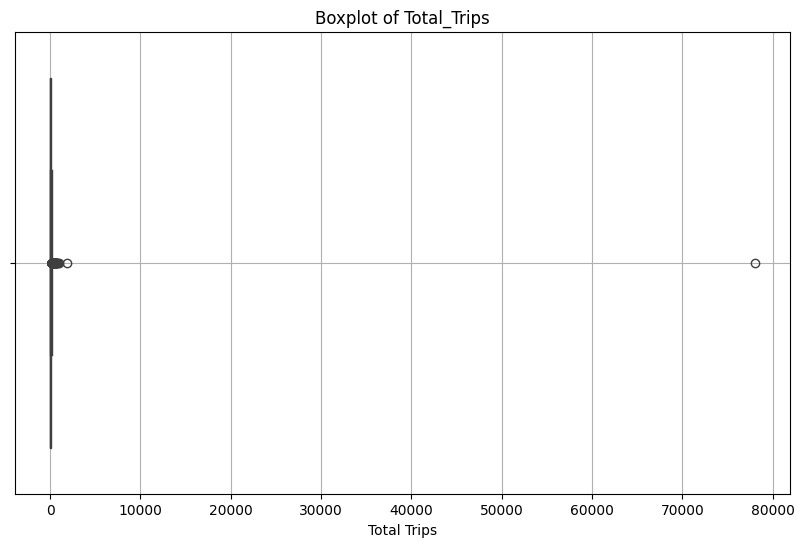

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Draw box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=regular_customer_2014['Total_Trips'])
plt.title('Boxplot of Total_Trips')
plt.xlabel('Total Trips')
plt.grid(True)
plt.show()

In [10]:
# Delete outliers
import numpy as np

# Calculate Q1 and Q3
Q1 = regular_customer_2014['Total_Trips'].quantile(0.25)
Q3 = regular_customer_2014['Total_Trips'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper bound
upper_bound = Q3 + 1.5 * IQR

# Filter out records higher than the upper bound
filtered_customer_2014_no_outlier = regular_customer_2014[regular_customer_2014['Total_Trips'] <= upper_bound]

In [11]:
print(upper_bound)

213.0


## Start an exploratory analysis

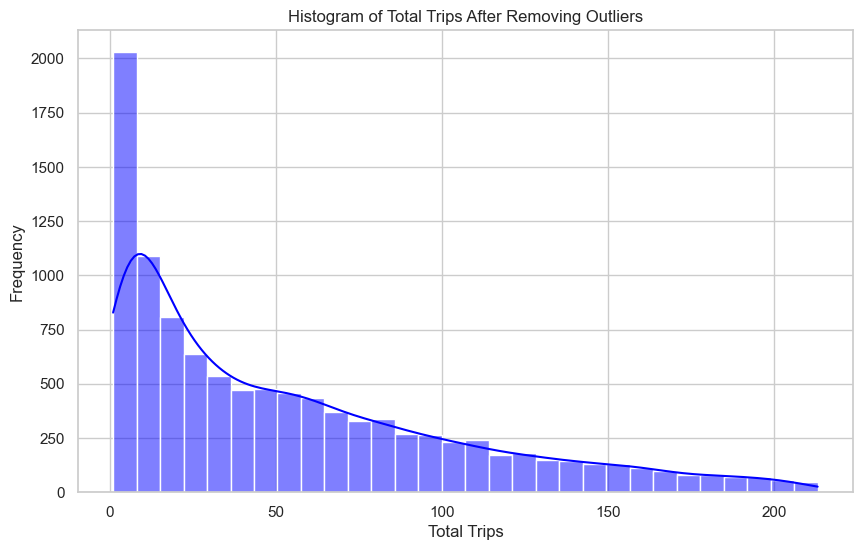

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style="whitegrid")

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(filtered_customer_2014_no_outlier['Total_Trips'], bins=30, kde=True, color='blue')
plt.title('Histogram of Total Trips After Removing Outliers')
plt.xlabel('Total Trips')
plt.ylabel('Frequency')
plt.show()

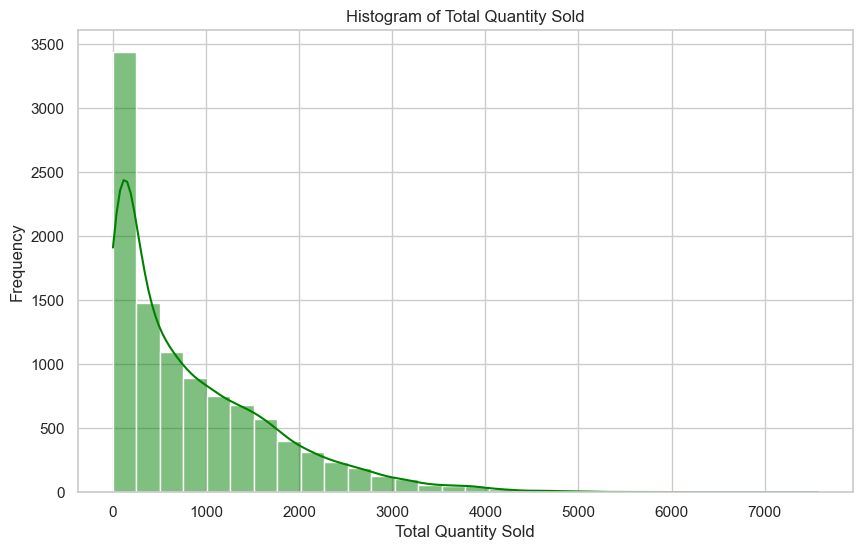

In [13]:
# Draw histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_customer_2014_no_outlier['Total_Quantity_Sold'], bins=30, kde=True, color='green')
plt.title('Histogram of Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Frequency')
plt.show()

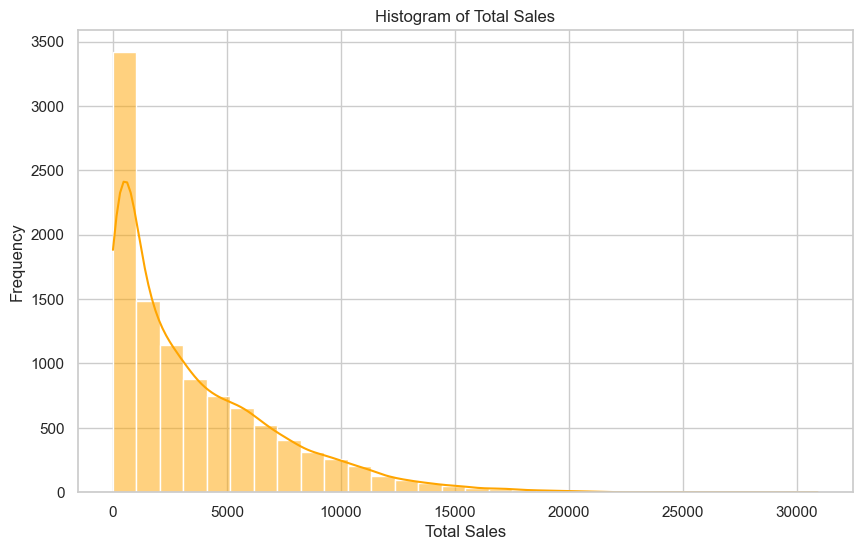

In [14]:
# Draw histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_customer_2014_no_outlier['Total_Sales'], bins=30, kde=True, color='orange')
plt.title('Histogram of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

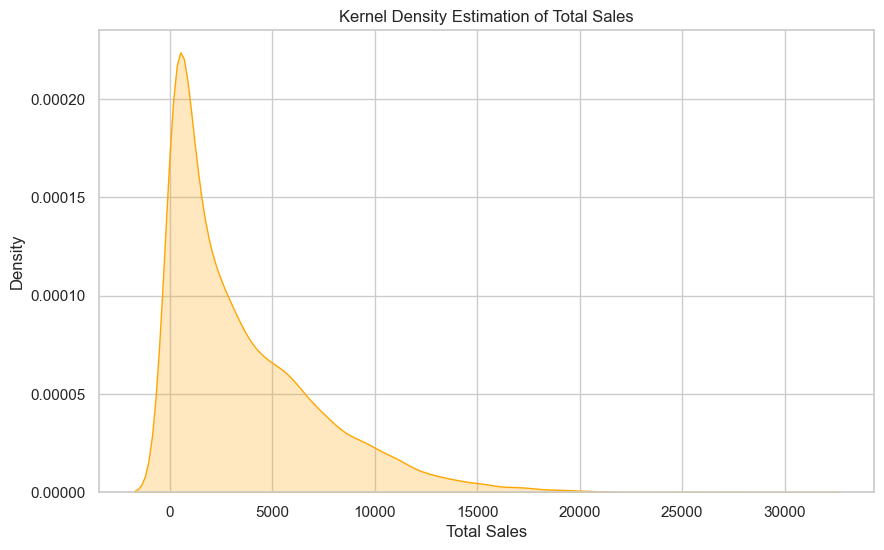

In [15]:
# Draw KDE diagram
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_customer_2014_no_outlier['Total_Sales'], color='orange', fill=True)
plt.title('Kernel Density Estimation of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Density')
plt.show()

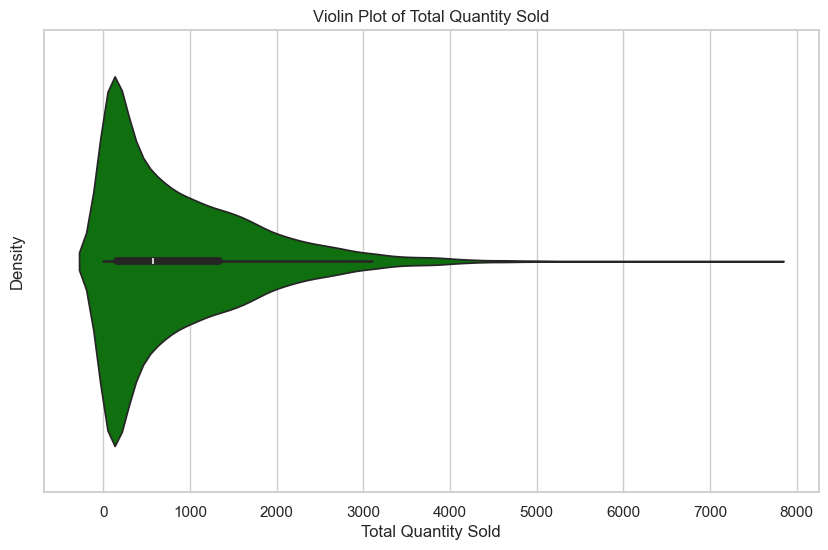

In [16]:
# Draw violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=filtered_customer_2014_no_outlier['Total_Quantity_Sold'], color='green')
plt.title('Violin Plot of Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Density')
plt.show()

**Supplementary content: Statistical analysis and interpretation of proportion**

In [17]:
filtered_customer_2014_no_outlier

,UniSA_Customer_No,Total_Trips,Total_Quantity_Sold,Total_Sales,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY
0,2.998270e+05,133,1700.6604,6482.3500,0.099490,0.0,0.0,0.0,0.081600,0.031223,0.0,0.0,0.0,0.118712,0.027319,0.197766,0.400201,0.004683,0.004182,0.034824
1,1.925237e+06,173,2791.4109,13409.4092,0.046969,0.0,0.0,0.0,0.073506,0.063788,0.0,0.0,0.0,0.081555,0.076265,0.059111,0.475210,0.020883,0.086452,0.016261
2,2.984536e+06,6,166.9898,742.8900,0.035268,0.0,0.0,0.0,0.118026,0.049092,0.0,0.0,0.0,0.100876,0.000000,0.306075,0.368426,0.000000,0.000000,0.022237
3,3.004639e+06,19,455.5841,1780.9700,0.075201,0.0,0.0,0.0,0.088048,0.074931,0.0,0.0,0.0,0.103387,0.054066,0.177443,0.408996,0.003313,0.000000,0.014616
4,5.225820e+06,17,37.4722,171.3100,0.079797,0.0,0.0,0.0,0.027436,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.194384,0.437161,0.261222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,9.993953e+09,29,560.6243,2076.0100,0.065809,0.0,0.0,0.0,0.106107,0.017254,0.0,0.0,0.0,0.015867,0.018516,0.234132,0.509877,0.000000,0.000000,0.032437
10999,9.994391e+09,9,284.0341,1449.5800,0.045075,0.0,0.0,0.0,0.125257,0.076353,0.0,0.0,0.0,0.100443,0.033423,0.127085,0.428621,0.029643,0.000000,0.034100
11000,9.994972e+09,60,809.0776,2629.0294,0.039197,0.0,0.0,0.0,0.150789,0.024298,0.0,0.0,0.0,0.081642,0.071026,0.282131,0.342320,0.006128,0.000000,0.002469
11001,9.996877e+09,5,88.4837,519.1600,0.017085,0.0,0.0,0.0,0.034806,0.106884,0.0,0.0,0.0,0.056052,0.000000,0.109485,0.400223,0.026119,0.099777,0.149569


In [18]:
filtered_customer_2014_no_outlier.describe()

,UniSA_Customer_No,Total_Trips,Total_Quantity_Sold,Total_Sales,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY
count,1.048800e+04,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,10488.000000,1.048800e+04,10488.000000
mean,4.961519e+09,54.426678,867.349960,3566.179173,0.061663,0.000089,0.000003,0.000006,0.110216,0.060397,0.000001,0.001870,0.000200,0.096878,0.046245,0.154161,0.383943,0.026396,2.662054e-02,0.031311
std,2.907267e+09,51.046773,890.196704,3684.228099,0.058414,0.003965,0.000236,0.000174,0.066982,0.066032,0.000060,0.013070,0.006913,0.082967,0.053164,0.091549,0.133299,0.042935,9.536021e-02,0.039771
min,2.998270e+05,1.000000,0.430000,1.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.112407,0.000000,-5.820043e-19,-0.306761
25%,2.477397e+09,12.000000,157.349550,647.177500,0.029259,0.000000,0.000000,0.000000,0.072221,0.021095,0.000000,0.000000,0.000000,0.042044,0.014630,0.094848,0.310707,0.000000,0.000000e+00,0.012126
50%,4.921703e+09,38.000000,576.620250,2333.128400,0.050473,0.000000,0.000000,0.000000,0.105156,0.047934,0.000000,0.000000,0.000000,0.085189,0.034825,0.145064,0.380651,0.013397,0.000000e+00,0.023536
75%,7.514525e+09,83.000000,1333.660625,5462.967000,0.077267,0.000000,0.000000,0.000000,0.138886,0.080158,0.000000,0.000000,0.000000,0.133403,0.061678,0.201997,0.451522,0.035717,2.687839e-04,0.039234
max,9.997118e+09,213.000000,7567.488400,30905.899000,1.000000,0.320639,0.023328,0.009509,1.000000,1.000000,0.005080,0.385754,0.692071,1.000000,1.000000,1.000000,1.000000,0.795104,1.000000e+00,1.000000


## Cluster Analysis

**首先查看一下total_trips和total_quantity_sold和total_sales之间的的关系**

In [22]:
filtered_customer_2014_no_outlier[['Total_Trips', 'Total_Quantity_Sold', 'Total_Sales']]

,Total_Trips,Total_Quantity_Sold,Total_Sales
0,133,1700.6604,6482.3500
1,173,2791.4109,13409.4092
2,6,166.9898,742.8900
3,19,455.5841,1780.9700
4,17,37.4722,171.3100
...,...,...,...
10998,29,560.6243,2076.0100
10999,9,284.0341,1449.5800
11000,60,809.0776,2629.0294
11001,5,88.4837,519.1600


C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1302720313.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_customer_2014_no_outlier['Cluster'] = clusters


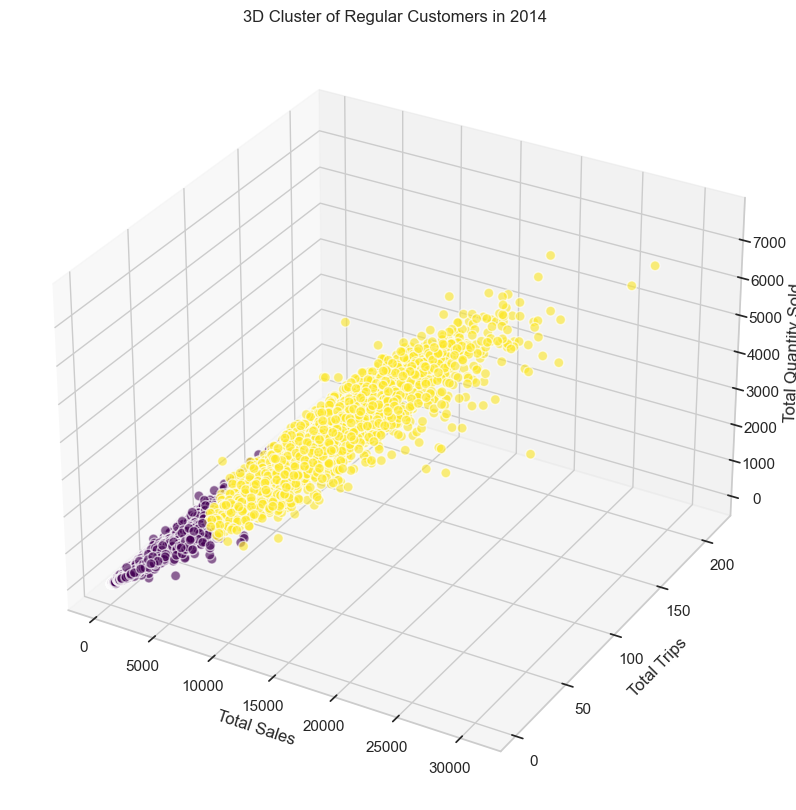

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 选择需要的特征
features = filtered_customer_2014_no_outlier[['Total_Trips', 'Total_Quantity_Sold', 'Total_Sales']]

# 数据标准化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 聚类分析
kmeans = KMeans(n_clusters=2, random_state=42)  # 假定我们选择了3个簇
clusters = kmeans.fit_predict(features_scaled)

# 将聚类结果加回原始数据
filtered_customer_2014_no_outlier['Cluster'] = clusters

# 创建三维散点图
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(filtered_customer_2014_no_outlier['Total_Sales'],
                     filtered_customer_2014_no_outlier['Total_Trips'],
                     filtered_customer_2014_no_outlier['Total_Quantity_Sold'],
                     c=filtered_customer_2014_no_outlier['Cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Trips')
ax.set_zlabel('Total Quantity Sold')
ax.set_title('3D Cluster of Regular Customers in 2014')

plt.show()

In [32]:
# 提取属于紫色簇（低价值顾客）的数据
low_value_regular_customer = filtered_customer_2014_no_outlier[filtered_customer_2014_no_outlier['Cluster'] == 0]

# 提取属于黄色簇（高价值顾客）的数据
high_value_regular_customer = filtered_customer_2014_no_outlier[filtered_customer_2014_no_outlier['Cluster'] == 1]

接着查看不同簇的统计情况。

In [33]:
low_value_regular_customer.columns

Index(['UniSA_Customer_No', 'Total_Trips', 'Total_Quantity_Sold',
       'Total_Sales', 'BAKERY', 'COOP GIFT CARDS', 'COOP XMAS CLUB',
       'Corporate Merch', 'DAIRY', 'DELI', 'Dept:0', 'EPAY', 'EXPENSE',
       'FRESH MEAT', 'FROZEN', 'FRUIT & VEG', 'GROCERY', 'SEAFOOD AND POULTRY',
       'TOBACCO', 'VARIETY', 'Cluster'],
      dtype='object')

In [34]:
import pandas as pd

low_value_cols = ['BAKERY', 'COOP GIFT CARDS', 'COOP XMAS CLUB', 'Corporate Merch', 'DAIRY', 'DELI', 'Dept:0', 'EPAY', 'EXPENSE', 'FRESH MEAT', 'FROZEN', 'FRUIT & VEG', 'GROCERY', 'SEAFOOD AND POULTRY', 'TOBACCO', 'VARIETY']
low_value_regular_customer_prop_department = low_value_regular_customer[low_value_cols]

high_value_cols = ['BAKERY', 'COOP GIFT CARDS', 'COOP XMAS CLUB', 'Corporate Merch', 'DAIRY', 'DELI', 'Dept:0', 'EPAY', 'EXPENSE', 'FRESH MEAT', 'FROZEN', 'FRUIT & VEG', 'GROCERY', 'SEAFOOD AND POULTRY', 'TOBACCO', 'VARIETY']
high_value_regular_customer_prop_department = high_value_regular_customer[high_value_cols]

In [28]:
low_value_regular_customer_prop_department.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,0.063525,0.000113,0.000003,0.000007,0.108630,0.061899,7.146426e-07,0.001973,0.000243,0.097229,0.045729,0.149463,0.384816,0.026427,2.719267e-02,0.032751
std,0.067124,0.004780,0.000277,0.000203,0.075716,0.076477,6.025501e-05,0.014736,0.008389,0.094095,0.060572,0.100342,0.151424,0.049106,1.006110e-01,0.046709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.112407,0.000000,-5.820043e-19,-0.306761
25%,0.025113,0.000000,0.000000,0.000000,0.064260,0.014031,0.000000e+00,0.000000,0.000000,0.030217,0.007435,0.082737,0.298162,0.000000,0.000000e+00,0.009128
50%,0.048859,0.000000,0.000000,0.000000,0.101943,0.044432,0.000000e+00,0.000000,0.000000,0.080395,0.030365,0.136948,0.380782,0.008434,0.000000e+00,0.022593
75%,0.080100,0.000000,0.000000,0.000000,0.140126,0.083447,0.000000e+00,0.000000,0.000000,0.137235,0.061664,0.199532,0.465850,0.034363,0.000000e+00,0.041244
max,1.000000,0.320639,0.023328,0.009509,1.000000,1.000000,5.080394e-03,0.385754,0.692071,1.000000,1.000000,1.000000,1.000000,0.795104,1.000000e+00,1.000000


In [29]:
high_value_regular_customer_prop_department.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY
count,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000,3379.000000
mean,0.057746,0.000039,0.000004,0.000005,0.113554,0.057238,0.000002,0.001654,0.000109,0.096138,0.047330,0.164045,0.382106,0.026331,0.025417,0.028282
std,0.033010,0.000850,0.000110,0.000085,0.042999,0.034851,0.000059,0.008566,0.000543,0.052332,0.032446,0.068476,0.083126,0.025473,0.083240,0.017492
min,0.000000,0.000000,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001787,0.036519,0.000000,0.000000,0.000000
25%,0.035998,0.000000,0.000000,0.000000,0.085410,0.032564,0.000000,0.000000,0.000000,0.059197,0.025107,0.117236,0.331597,0.007775,0.000000,0.016388
50%,0.053019,0.000000,0.000000,0.000000,0.109360,0.052593,0.000000,0.000000,0.000000,0.091319,0.040267,0.157857,0.380599,0.019737,0.000000,0.024506
75%,0.072837,0.000000,0.000000,0.000000,0.136666,0.075962,0.000000,0.000000,0.000000,0.127655,0.061698,0.205541,0.431870,0.037475,0.000852,0.035959
max,0.365453,0.035749,0.004191,0.002435,0.532255,0.321685,0.002248,0.192274,0.010030,0.362126,0.275935,0.750499,0.802529,0.256631,0.836382,0.189459


在这里也先对两个cluster的结果进行比较，查看low和high的proportion的区别，然后进行下一步的区分。

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\4232940708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_value_regular_customer_prop_department['Customer_Type'] = 'Low Value'
C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\4232940708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_regular_customer_prop_department['Customer_Type'] = 'High Value'


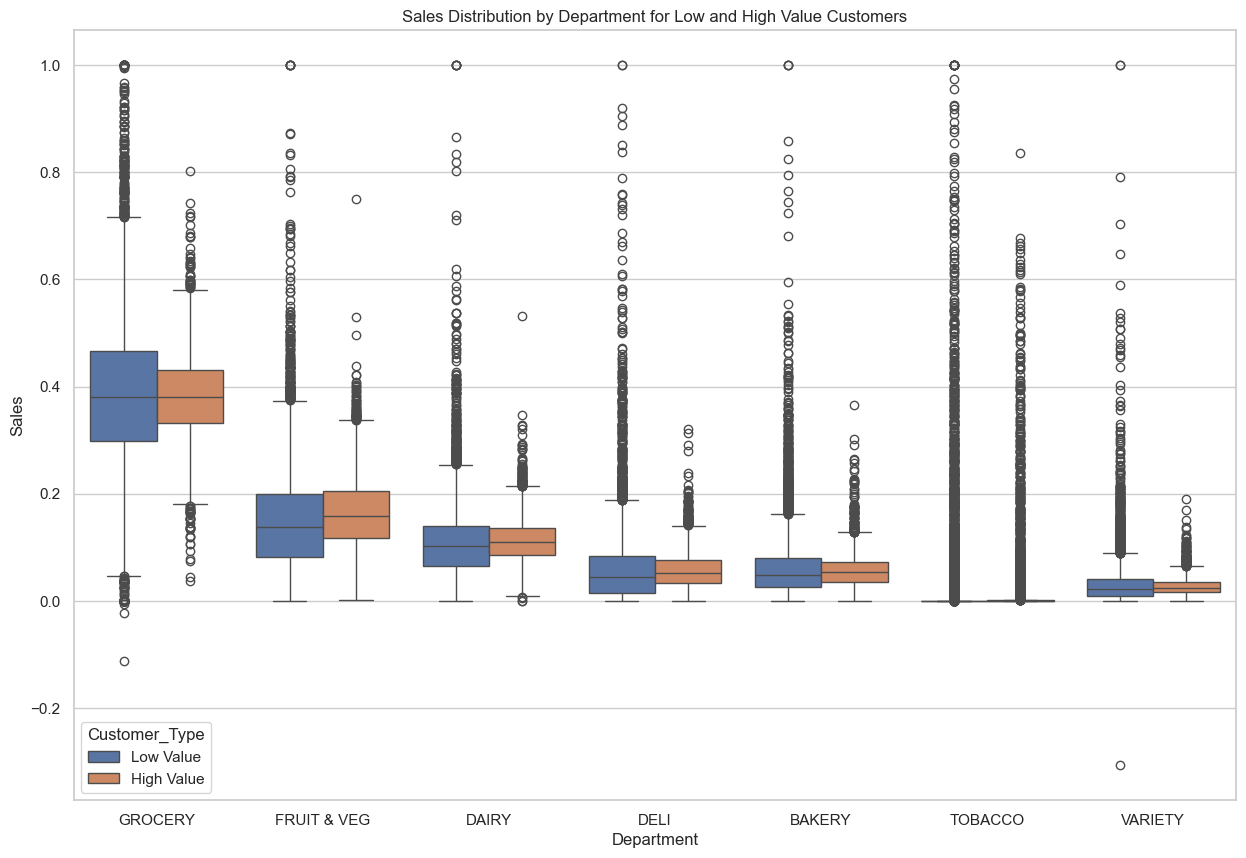

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 制作数据适合进行boxplot的形式
# 首先将这两个数据集合并起来，并添加一个新列以区分它们
low_value_regular_customer_prop_department['Customer_Type'] = 'Low Value'
high_value_regular_customer_prop_department['Customer_Type'] = 'High Value'
combined_data = pd.concat([low_value_regular_customer_prop_department, high_value_regular_customer_prop_department], axis=0)

# 指定我们关注的列
columns_to_visualize = ['GROCERY', 'FRUIT & VEG', 'DAIRY', 'DELI', 'BAKERY', 'TOBACCO', 'VARIETY']

# 将数据重塑为长格式，以便于使用seaborn进行boxplot的绘制
melted_data = combined_data.melt(id_vars=['Customer_Type'], value_vars=columns_to_visualize, var_name='Department', value_name='Sales')

# 绘制boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Department', y='Sales', hue='Customer_Type', data=melted_data)
plt.title('Sales Distribution by Department for Low and High Value Customers')
plt.show()

**接着开始进行分批查看**

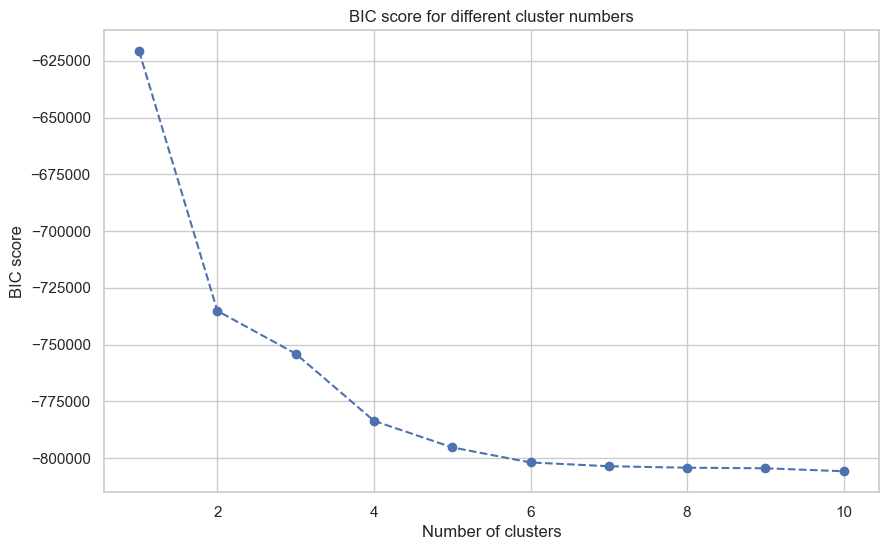

Optimal number of clusters: 4


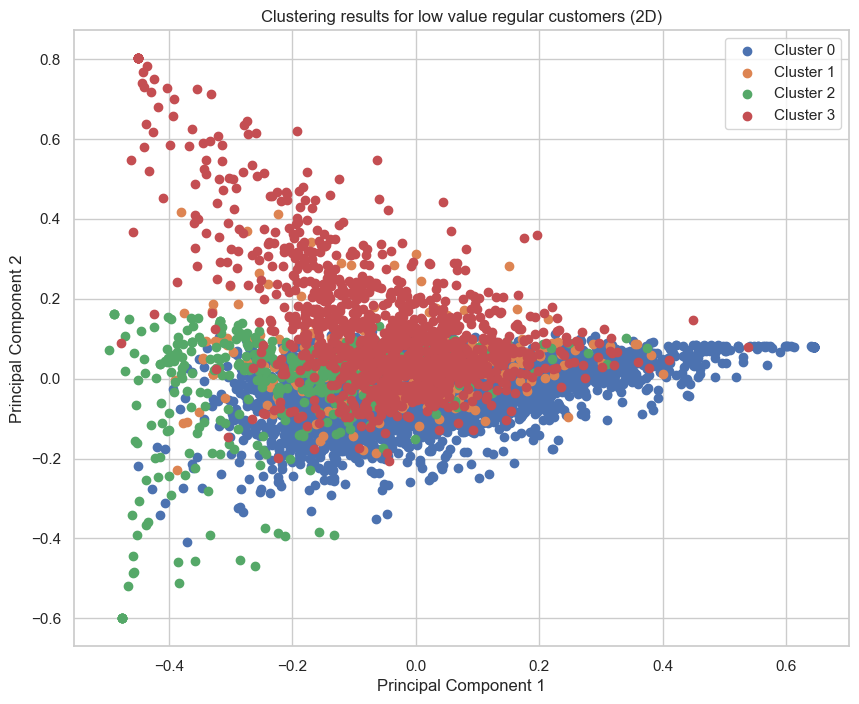

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 假设low_value_regular_customer_prop_department是你提取的DataFrame
data = low_value_regular_customer_prop_department.reset_index(drop=True)

# 计算BIC分数函数
def calculate_bic(gmm, data):
    return gmm.bic(data)

# 测试不同聚类数量
n_components = np.arange(1, 11)
bic_scores = [calculate_bic(GaussianMixture(n_components=n, covariance_type='full').fit(data), data) for n in n_components]

# 绘制BIC分数曲线
plt.figure(figsize=(10, 6))
plt.plot(n_components, bic_scores, linestyle='--', marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')
plt.title('BIC score for different cluster numbers')
plt.show()

# 根据BIC分数选择最佳聚类数量
optimal_n_components = 4
print(f'Optimal number of clusters: {optimal_n_components}')

# 使用最佳聚类数量进行GMM聚类
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full').fit(data)
labels = gmm.predict(data)

# 添加聚类标签到原始数据
data['Cluster'] = labels

# 使用PCA降维聚类结果
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(data.iloc[:, :-1])  # 不包括"Cluster"列

# 可视化降维后的聚类结果
plt.figure(figsize=(10, 8))
for cluster in range(optimal_n_components):
    cluster_data = cluster_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label=f'Cluster {cluster}')
plt.legend()
plt.title('Clustering results for low value regular customers (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [41]:
low_value_regular_customer_cluster_0 = data[data['Cluster'] == 0]

In [42]:
low_value_regular_customer_cluster_0.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,5292.000000,5292.0,5292.0,5292.000000,5292.000000,5292.000000,5.292000e+03,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5.292000e+03,5292.000000,5292.0
mean,0.061018,0.0,0.0,0.000005,0.113765,0.058091,9.600140e-07,0.000004,0.000034,0.097702,0.043983,0.160036,0.411046,0.022481,9.645794e-05,0.031737,0.0
std,0.049926,0.0,0.0,0.000147,0.065557,0.054370,6.983731e-05,0.000106,0.000333,0.084312,0.046142,0.091339,0.141938,0.031565,4.731366e-04,0.032129,0.0
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.820043e-19,0.000000,0.0
25%,0.026647,0.0,0.0,0.000000,0.072626,0.016182,0.000000e+00,0.000000,0.000000,0.034578,0.008958,0.098986,0.323685,0.000000,0.000000e+00,0.010496,0.0
50%,0.050067,0.0,0.0,0.000000,0.108521,0.046262,0.000000e+00,0.000000,0.000000,0.083884,0.031937,0.149636,0.396303,0.008859,0.000000e+00,0.023791,0.0
75%,0.080950,0.0,0.0,0.000000,0.145962,0.083730,0.000000e+00,0.000000,0.000000,0.139456,0.063309,0.210534,0.481655,0.033448,0.000000e+00,0.042561,0.0
max,0.325919,0.0,0.0,0.008237,0.517772,0.330692,5.080394e-03,0.004305,0.006433,0.559045,0.291564,0.695231,1.000000,0.179100,4.908080e-03,0.238784,0.0


In [43]:
low_value_regular_customer_cluster_1 = data[data['Cluster'] == 1]

In [44]:
low_value_regular_customer_cluster_1.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,272.000000,272.0,272.0,272.0,272.000000,272.000000,272.0,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.0
mean,0.079488,0.0,0.0,0.0,0.151190,0.047908,0.0,0.039063,0.005589,0.053713,0.047046,0.091957,0.316522,0.028021,0.036328,0.103176,1.0
std,0.105913,0.0,0.0,0.0,0.201030,0.072539,0.0,0.062948,0.042585,0.064527,0.079868,0.083241,0.167360,0.065306,0.085517,0.167539,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.306761,1.0
25%,0.013010,0.0,0.0,0.0,0.039524,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.020958,0.201650,0.000000,0.000000,0.010439,1.0
50%,0.049289,0.0,0.0,0.0,0.087657,0.020875,0.0,0.000000,0.000000,0.033520,0.017816,0.077480,0.328676,0.000000,0.000000,0.031190,1.0
75%,0.097768,0.0,0.0,0.0,0.155581,0.064219,0.0,0.067511,0.000000,0.088486,0.056953,0.134364,0.434179,0.025555,0.018715,0.125340,1.0
max,0.764879,0.0,0.0,0.0,1.000000,0.415403,0.0,0.385754,0.692071,0.329392,0.506339,0.394269,0.799194,0.523379,0.500351,1.000000,1.0


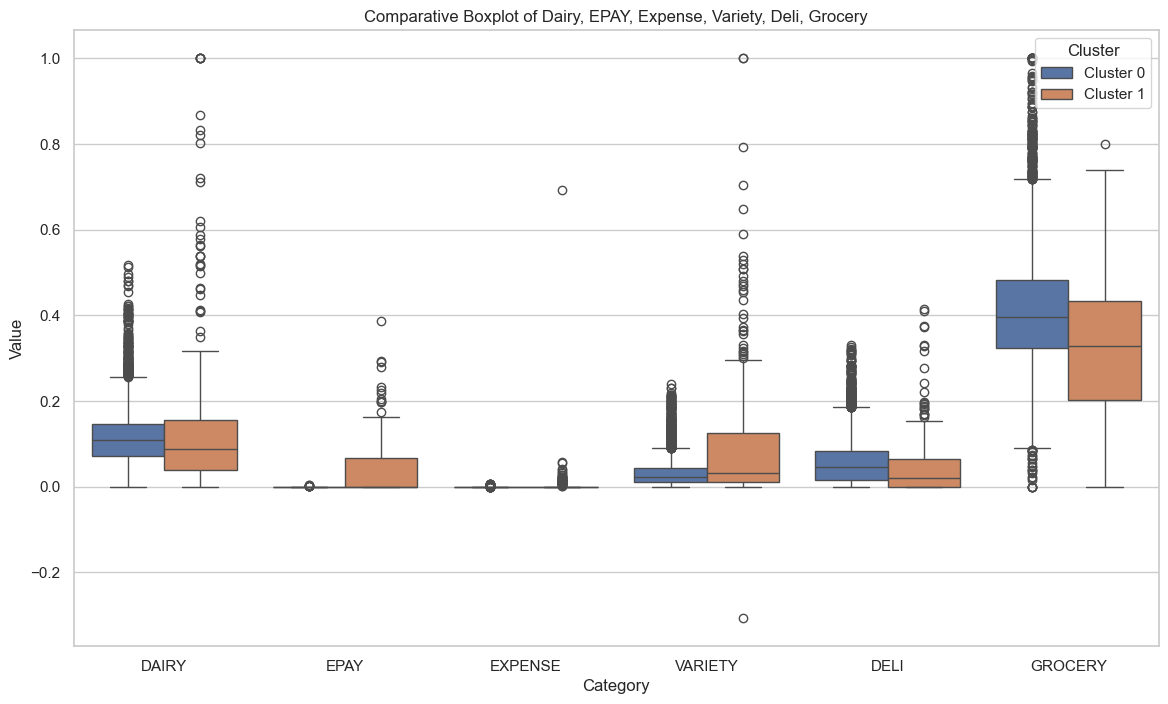

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 low_value_regular_customer_cluster_0 和 low_value_regular_customer_cluster_1 是已经定义好的数据集
# 并且包含 'DAIRY', 'EPAY', 'EXPENSE', 'VARIETY', 'DELI', 'GROCERY' 这些列

# 准备数据：将两个数据集合并，并添加一个新列以区分它们
cluster_0 = low_value_regular_customer_cluster_0.copy()
cluster_1 = low_value_regular_customer_cluster_1.copy()
cluster_0['Cluster'] = 'Cluster 0'
cluster_1['Cluster'] = 'Cluster 1'
combined_data = pd.concat([cluster_0, cluster_1])

# 选定需要进行可视化的列
columns_to_visualize = ['DAIRY', 'EPAY', 'EXPENSE', 'VARIETY', 'DELI', 'GROCERY']

# 重塑数据以适合seaborn的boxplot函数
melted_data = combined_data.melt(id_vars='Cluster', value_vars=columns_to_visualize, var_name='Category', value_name='Value')

# 绘制boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', hue='Cluster', data=melted_data)
plt.title('Comparative Boxplot of Dairy, EPAY, Expense, Variety, Deli, Grocery')
plt.show()

In [45]:
low_value_regular_customer_cluster_2 = data[data['Cluster'] == 2]

In [47]:
low_value_regular_customer_cluster_2.describe()·

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,402.000000,402.000000,402.000000,402.0,402.000000,402.000000,402.0,402.000000,402.0,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.0
mean,0.123404,0.001948,0.000058,0.0,0.058359,0.154992,0.0,0.000116,0.0,0.114732,0.079731,0.160606,0.200422,0.087977,0.000046,0.017609,2.0
std,0.177049,0.020011,0.001163,0.0,0.071419,0.214285,0.0,0.001893,0.0,0.201174,0.164495,0.203220,0.149557,0.141678,0.000566,0.029455,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-0.112407,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.032110,0.076938,0.000000,0.000000,0.000000,2.0
50%,0.048740,0.000000,0.000000,0.0,0.041068,0.049123,0.0,0.000000,0.0,0.017979,0.000000,0.096376,0.201435,0.000000,0.000000,0.002144,2.0
75%,0.163035,0.000000,0.000000,0.0,0.087074,0.293066,0.0,0.000000,0.0,0.124731,0.057252,0.187309,0.291760,0.178480,0.000000,0.024255,2.0
max,1.000000,0.320639,0.023328,0.0,0.421496,1.000000,0.0,0.036649,0.0,1.000000,1.000000,1.000000,0.723949,0.795104,0.010730,0.184714,2.0


In [49]:
low_value_regular_customer_cluster_3 = data[data['Cluster'] == 3]
low_value_regular_customer_cluster_3.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,1143.000000,1143.000000,1143.0,1143.000000,1143.000000,1143.000000,1143.0,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,0.050272,0.000017,0.0,0.000019,0.092405,0.050119,0.0,0.002912,0.000024,0.099236,0.041539,0.110274,0.344480,0.022671,0.160020,0.026012,3.0
std,0.036036,0.000570,0.0,0.000397,0.051798,0.045076,0.0,0.007887,0.000268,0.080068,0.038959,0.070591,0.130301,0.030200,0.199820,0.022785,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005076,0.000000,0.000000,0.000000,3.0
25%,0.025909,0.000000,0.0,0.000000,0.055817,0.015572,0.0,0.000000,0.000000,0.043963,0.013483,0.059413,0.264577,0.000000,0.020153,0.009670,3.0
50%,0.044299,0.000000,0.0,0.000000,0.088783,0.039088,0.0,0.000000,0.000000,0.085524,0.031525,0.100368,0.349194,0.010870,0.084870,0.020642,3.0
75%,0.067276,0.000000,0.0,0.000000,0.120861,0.073457,0.0,0.000000,0.000000,0.138159,0.057154,0.147466,0.428507,0.034741,0.221176,0.035939,3.0
max,0.210078,0.019261,0.0,0.009509,0.303421,0.284980,0.0,0.051216,0.004826,0.802936,0.226939,0.444231,0.895125,0.205206,1.000000,0.174954,3.0


2和3比较

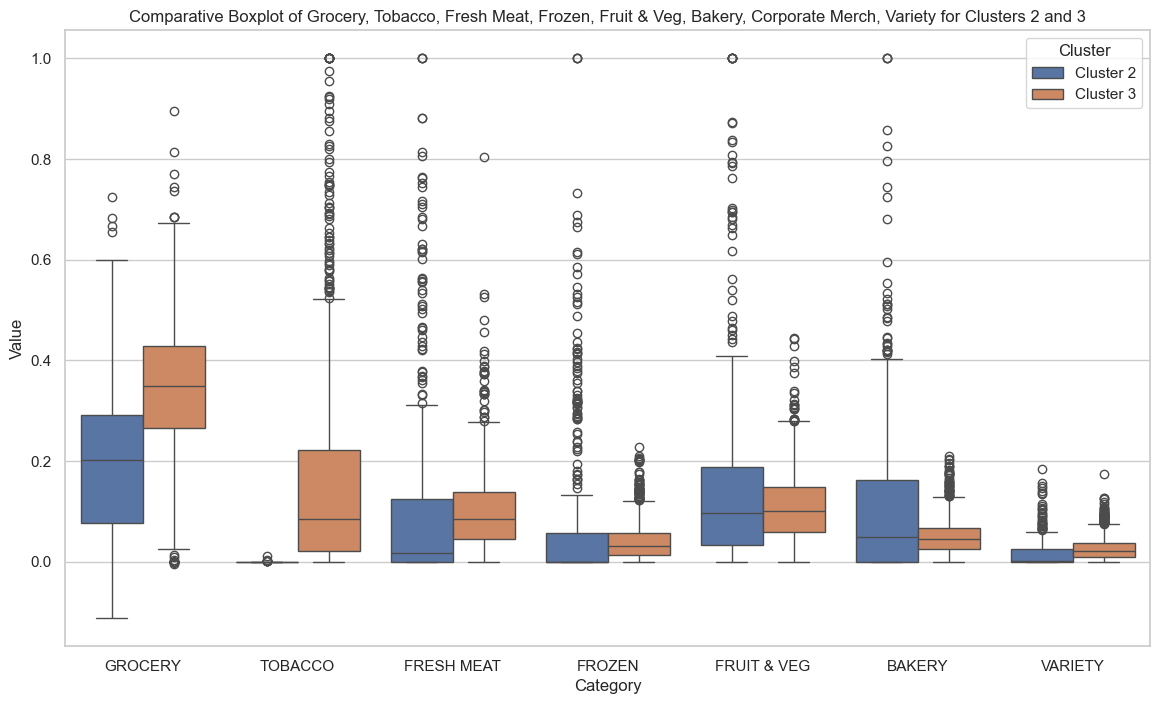

In [62]:
# 假设 low_value_regular_customer_cluster_2 和 low_value_regular_customer_cluster_3 是已经定义好的数据集
# 并且包含 'GROCERY', 'TOBACCO', 'FRESH MEAT', 'FROZEN', 'FRUIT & VEG', 'BAKERY', 'Corporate Merch', 'VARIETY' 这些列

# 准备数据：将两个数据集合并，并添加一个新列以区分它们
cluster_2 = low_value_regular_customer_cluster_2.copy()
cluster_3 = low_value_regular_customer_cluster_3.copy()
cluster_2['Cluster'] = 'Cluster 2'
cluster_3['Cluster'] = 'Cluster 3'
combined_data_clusters_23 = pd.concat([cluster_2, cluster_3])

# 选定需要进行可视化的列
columns_to_visualize_clusters_23 = ['GROCERY', 'TOBACCO', 'FRESH MEAT', 'FROZEN', 'FRUIT & VEG', 'BAKERY', 'VARIETY']

# 重塑数据以适合seaborn的boxplot函数
melted_data_clusters_23 = combined_data_clusters_23.melt(id_vars='Cluster', value_vars=columns_to_visualize_clusters_23, var_name='Category', value_name='Value')

# 绘制boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', hue='Cluster', data=melted_data_clusters_23)
plt.title('Comparative Boxplot of Grocery, Tobacco, Fresh Meat, Frozen, Fruit & Veg, Bakery, Corporate Merch, Variety for Clusters 2 and 3')
plt.show()

上述：

1. 将上述的结果都先打印出来，然后进行描述
2. 将主要的差异进行boxplot，然后进行可视化比较

然后发现四个类别的区别，并且回答一下问题。

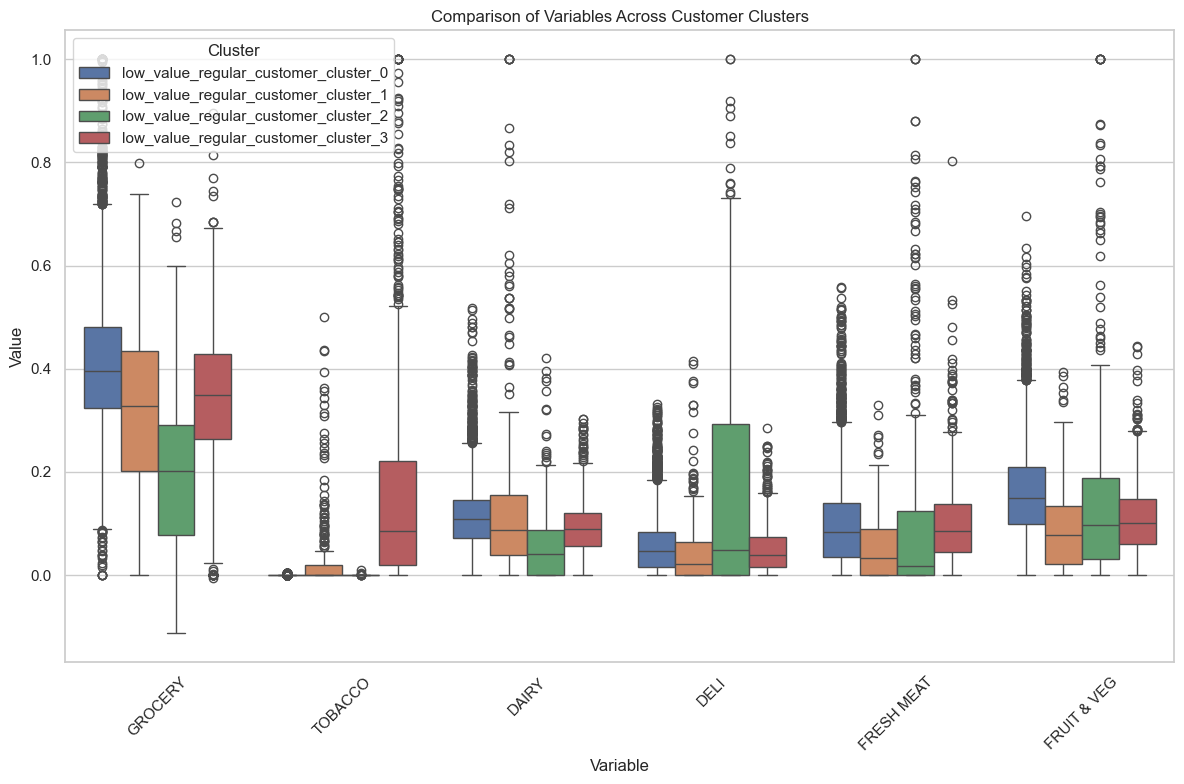

In [66]:
import pandas as pd

# 假设 cluster_0, cluster_1, cluster_2, cluster_3 是已经存在的DataFrame
cluster_0['Cluster'] = 'low_value_regular_customer_cluster_0'
cluster_1['Cluster'] = 'low_value_regular_customer_cluster_1'
cluster_2['Cluster'] = 'low_value_regular_customer_cluster_2'
cluster_3['Cluster'] = 'low_value_regular_customer_cluster_3'

# 合并DataFrame
frames = [cluster_0, cluster_1, cluster_2, cluster_3]
combined_df = pd.concat(frames)

# 选择的变量应与数据集中的列名完全一致
selected_vars = ['GROCERY', 'TOBACCO', 'DAIRY', 'DELI', 'FRESH MEAT', 'FRUIT & VEG']
df_long = pd.melt(combined_df, id_vars=['Cluster'], value_vars=selected_vars,
                  var_name='Variable', value_name='Value')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', hue='Cluster', data=df_long)
plt.title('Comparison of Variables Across Customer Clusters')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper left')
plt.tight_layout()
plt.show()

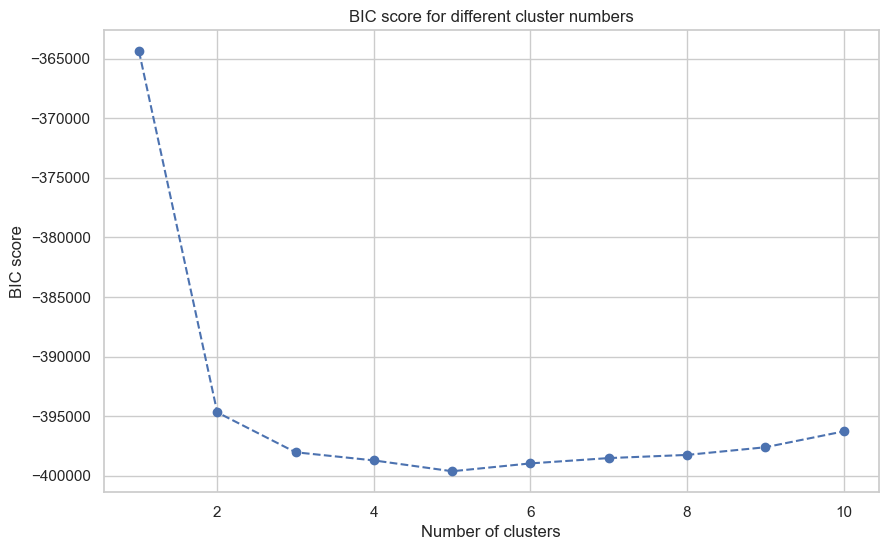

Optimal number of clusters: 2


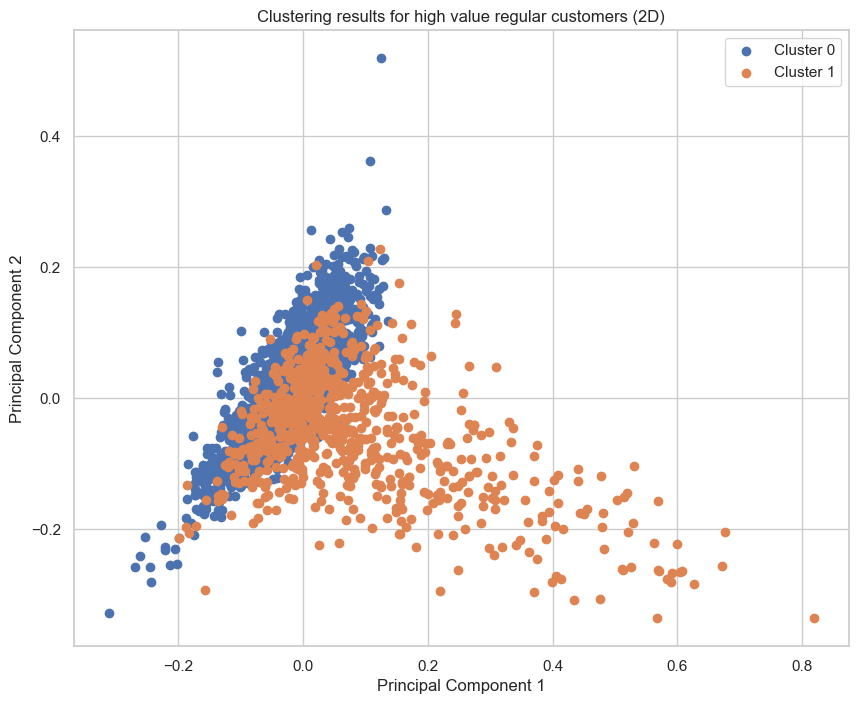

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# 假设low_value_regular_customer_prop_department是你提取的DataFrame
data = high_value_regular_customer_prop_department.reset_index(drop=True)

# 计算BIC分数函数
def calculate_bic(gmm, data):
    return gmm.bic(data)

# 测试不同聚类数量
n_components = np.arange(1, 11)
bic_scores = [calculate_bic(GaussianMixture(n_components=n, covariance_type='full').fit(data), data) for n in n_components]

# 绘制BIC分数曲线
plt.figure(figsize=(10, 6))
plt.plot(n_components, bic_scores, linestyle='--', marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('BIC score')
plt.title('BIC score for different cluster numbers')
plt.show()

# 根据BIC分数选择最佳聚类数量
optimal_n_components = 2
print(f'Optimal number of clusters: {optimal_n_components}')

# 使用最佳聚类数量进行GMM聚类
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full').fit(data)
labels = gmm.predict(data)

# 添加聚类标签到原始数据
data['Cluster'] = labels

# 使用PCA降维聚类结果
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(data.iloc[:, :-1])  # 不包括"Cluster"列

# 可视化降维后的聚类结果
plt.figure(figsize=(10, 8))
for cluster in range(optimal_n_components):
    cluster_data = cluster_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label=f'Cluster {cluster}')
plt.legend()
plt.title('Clustering results for high value regular customers (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [68]:
data

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
0,0.099490,0.0,0.0,0.0,0.081600,0.031223,0.0,0.0,0.0,0.118712,0.027319,0.197766,0.400201,0.004683,0.004182,0.034824,0
1,0.046969,0.0,0.0,0.0,0.073506,0.063788,0.0,0.0,0.0,0.081555,0.076265,0.059111,0.475210,0.020883,0.086452,0.016261,1
2,0.042443,0.0,0.0,0.0,0.087899,0.107814,0.0,0.0,0.0,0.081279,0.029206,0.189208,0.373347,0.063510,0.000000,0.025295,0
3,0.061823,0.0,0.0,0.0,0.075601,0.029028,0.0,0.0,0.0,0.107296,0.050827,0.091177,0.499384,0.003229,0.052383,0.029250,1
4,0.088218,0.0,0.0,0.0,0.098313,0.065761,0.0,0.0,0.0,0.113941,0.039265,0.138118,0.398015,0.042559,0.000000,0.015811,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,0.053819,0.0,0.0,0.0,0.145015,0.054164,0.0,0.0,0.0,0.034529,0.032782,0.165786,0.457247,0.033982,0.000000,0.022676,0
3375,0.123575,0.0,0.0,0.0,0.057376,0.132521,0.0,0.0,0.0,0.003375,0.052193,0.173963,0.436991,0.000000,0.000000,0.020006,0
3376,0.031149,0.0,0.0,0.0,0.239354,0.017415,0.0,0.0,0.0,0.159755,0.018601,0.137310,0.318137,0.034440,0.017903,0.025936,1
3377,0.112517,0.0,0.0,0.0,0.104611,0.048799,0.0,0.0,0.0,0.112701,0.062312,0.119150,0.393641,0.033964,0.000000,0.012305,0


In [69]:
high_value_regular_customer_prop_department_0 = data[data['Cluster'] == 0]

In [70]:
high_value_regular_customer_prop_department_1 = data[data['Cluster'] == 1]

In [72]:
high_value_regular_customer_prop_department_0.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.00000,2601.000000,2601.0
mean,0.058841,0.000041,0.000004,0.000005,0.117153,0.058261,0.000003,0.000086,0.000119,0.096400,0.047940,0.174631,0.389937,0.027374,0.00023,0.028974,0.0
std,0.033981,0.000907,0.000113,0.000091,0.042824,0.034900,0.000067,0.000507,0.000583,0.052542,0.032688,0.066801,0.078405,0.026511,0.00068,0.017963,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001787,0.134973,0.000000,0.00000,0.000000,0.0
25%,0.036236,0.000000,0.000000,0.000000,0.089019,0.033763,0.000000,0.000000,0.000000,0.058941,0.025647,0.128702,0.338176,0.008071,0.00000,0.017195,0.0
50%,0.054125,0.000000,0.000000,0.000000,0.113203,0.053587,0.000000,0.000000,0.000000,0.091930,0.040913,0.167740,0.386501,0.020515,0.00000,0.025081,0.0
75%,0.074350,0.000000,0.000000,0.000000,0.140352,0.077537,0.000000,0.000000,0.000000,0.127276,0.062107,0.212190,0.436255,0.038913,0.00000,0.036694,0.0
max,0.365453,0.035749,0.004191,0.002435,0.532255,0.321685,0.002248,0.004798,0.010030,0.362126,0.275935,0.750499,0.802529,0.256631,0.00508,0.189459,0.0


In [73]:
high_value_regular_customer_prop_department_1.describe()

,BAKERY,COOP GIFT CARDS,COOP XMAS CLUB,Corporate Merch,DAIRY,DELI,Dept:0,EPAY,EXPENSE,FRESH MEAT,FROZEN,FRUIT & VEG,GROCERY,SEAFOOD AND POULTRY,TOBACCO,VARIETY,Cluster
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.0,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.0
mean,0.054083,0.000033,0.000004,0.000002,0.101524,0.053817,0.0,0.006897,0.000076,0.095263,0.045291,0.128654,0.355924,0.022844,0.109623,0.025966,1.0
std,0.029255,0.000625,0.000101,0.000063,0.041390,0.034489,0.0,0.016805,0.000378,0.051646,0.031558,0.061837,0.092621,0.021291,0.144563,0.015604,0.0
min,0.000639,0.000000,0.000000,0.000000,0.005293,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005752,0.036519,0.000000,0.000000,0.001839,1.0
25%,0.035125,0.000000,0.000000,0.000000,0.073898,0.029271,0.0,0.000000,0.000000,0.060229,0.023761,0.083148,0.303891,0.007313,0.008805,0.014525,1.0
50%,0.048948,0.000000,0.000000,0.000000,0.097518,0.048799,0.0,0.000000,0.000000,0.089811,0.038026,0.119063,0.358634,0.017568,0.050055,0.022644,1.0
75%,0.066467,0.000000,0.000000,0.000000,0.124753,0.070460,0.0,0.006253,0.000000,0.127939,0.059038,0.165446,0.413061,0.034844,0.153204,0.033927,1.0
max,0.227482,0.015887,0.002829,0.001754,0.284097,0.313221,0.0,0.192274,0.004906,0.296004,0.249228,0.394439,0.685852,0.171921,0.836382,0.101226,1.0


boxplot：

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1153440567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0_selected['Cluster'] = 'Cluster 0'
C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1153440567.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['Cluster'] = 'Cluster 1'


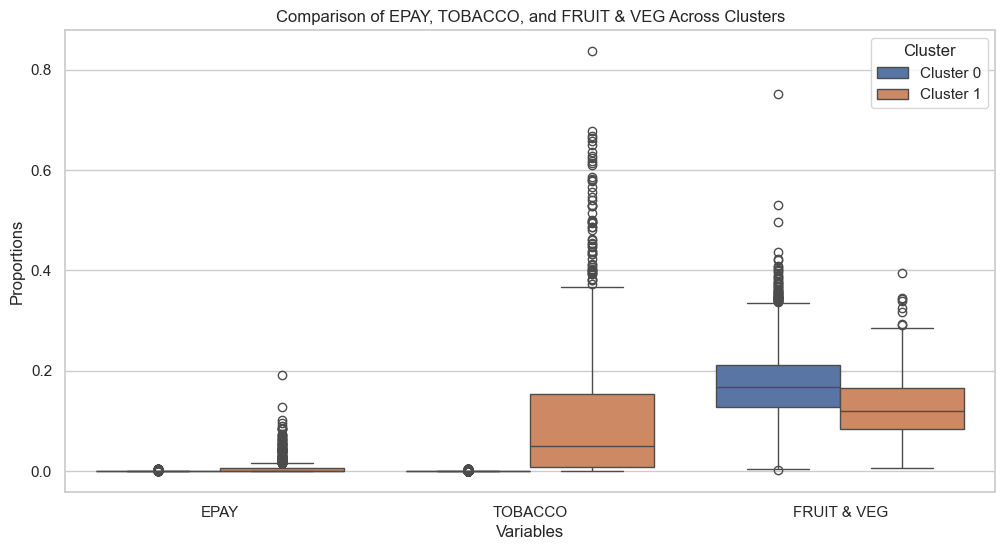

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的DataFrame分别命名为 df0 和 df1
# 你可以根据实际情况调整DataFrame的名字

# 选择需要可视化的变量
variables = ['EPAY', 'TOBACCO', 'FRUIT & VEG']

# 创建一个新的DataFrame，包含需要的变量和一个新的列来标记数据来源（聚类）
df0_selected = high_value_regular_customer_prop_department_0[variables]
df0_selected['Cluster'] = 'Cluster 0'

df1_selected = high_value_regular_customer_prop_department_1[variables]
df1_selected['Cluster'] = 'Cluster 1'

# 合并两个数据集
combined_df = pd.concat([df0_selected, df1_selected])

# 绘制箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Cluster', data=pd.melt(combined_df, id_vars=['Cluster']))
plt.title('Comparison of EPAY, TOBACCO, and FRUIT & VEG Across Clusters')
plt.xlabel('Variables')
plt.ylabel('Proportions')
plt.legend(title='Cluster')
plt.show()


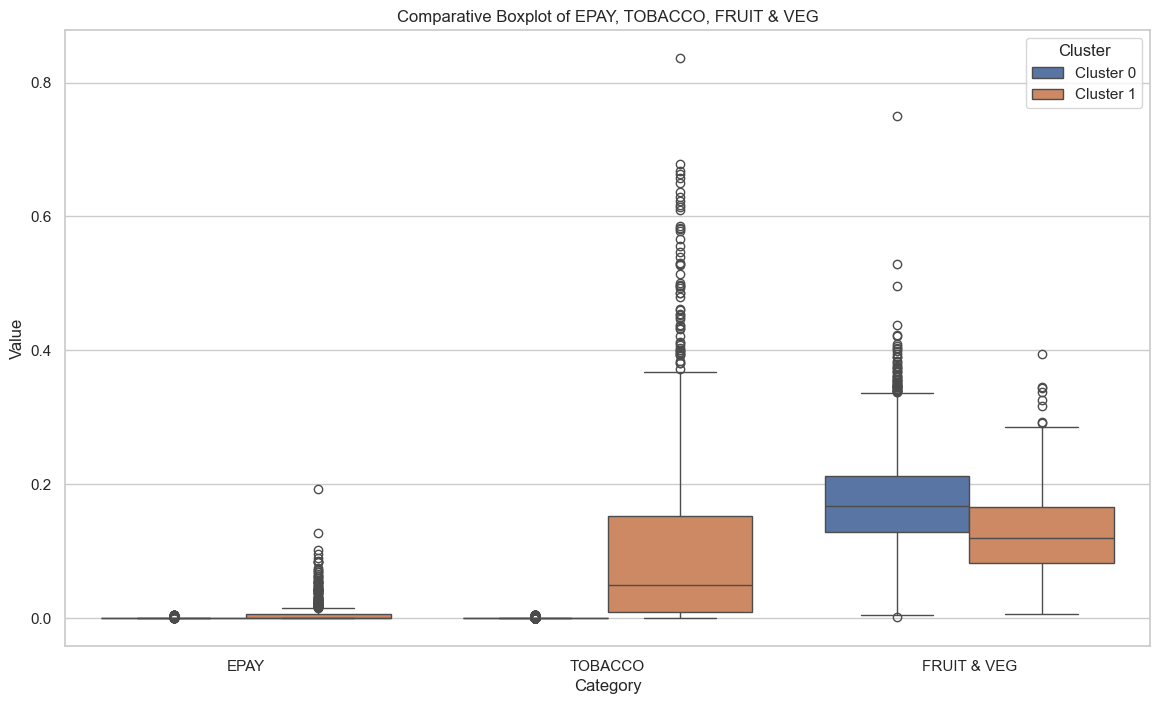

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 low_value_regular_customer_cluster_0 和 low_value_regular_customer_cluster_1 是已经定义好的数据集
# 并且包含 'DAIRY', 'EPAY', 'EXPENSE', 'VARIETY', 'DELI', 'GROCERY' 这些列

# 准备数据：将两个数据集合并，并添加一个新列以区分它们
cluster_0 = high_value_regular_customer_prop_department_0.copy()
cluster_1 = high_value_regular_customer_prop_department_1.copy()
cluster_0['Cluster'] = 'Cluster 0'
cluster_1['Cluster'] = 'Cluster 1'
combined_data = pd.concat([cluster_0, cluster_1])

# 选定需要进行可视化的列
columns_to_visualize = ['EPAY', 'TOBACCO', 'FRUIT & VEG']

# 重塑数据以适合seaborn的boxplot函数
melted_data = combined_data.melt(id_vars='Cluster', value_vars=columns_to_visualize, var_name='Category', value_name='Value')

# 绘制boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', hue='Cluster', data=melted_data)
plt.title('Comparative Boxplot of EPAY, TOBACCO, FRUIT & VEG')
plt.show()

# Time Series

**Visualization Analysis**

In [50]:
import pandas as pd

df_2013_clean['Sale_Date'] = pd.to_datetime(df_2013_clean['Sale_Date'], format='mixed', infer_datetime_format=True)
df_2014_clean['Sale_Date'] = pd.to_datetime(df_2014_clean['Sale_Date'], format='mixed', infer_datetime_format=True)
df_2015_clean['Sale_Date'] = pd.to_datetime(df_2015_clean['Sale_Date'], format='mixed', infer_datetime_format=True)

df_2013_clean['Year'] = df_2013_clean['Sale_Date'].dt.year
df_2013_clean['Month'] = df_2013_clean['Sale_Date'].dt.month
df_2014_clean['Year'] = df_2014_clean['Sale_Date'].dt.year
df_2014_clean['Month'] = df_2014_clean['Sale_Date'].dt.month
df_2015_clean['Year'] = df_2015_clean['Sale_Date'].dt.year
df_2015_clean['Month'] = df_2015_clean['Sale_Date'].dt.month


all_data = pd.concat([df_2013_clean, df_2014_clean, df_2015_clean], ignore_index=True)

total_sales = all_data.groupby(['Year', 'Month'])['Item_Value'].sum().reset_index()

date_range = pd.date_range(start='2013-01-01', end='2015-12-31', freq='M')
years = date_range.year
months = date_range.month

all_months = pd.DataFrame({'Year': years, 'Month': months})

df_total_sales = pd.merge(all_months, total_sales, on=['Year', 'Month'], how='left').fillna(0)

df_total_sales.rename(columns={'Item_Value': 'Total_Sales'}, inplace=True)
df_total_sales.sort_values(by=['Year', 'Month'], inplace=True)

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1615193501.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_2013_clean['Sale_Date'] = pd.to_datetime(df_2013_clean['Sale_Date'], format='mixed', infer_datetime_format=True)
C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1615193501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_clean['Sale_Date'] = pd.to_datetime(df_2013_clean['Sale_Date'], format='mixed', infer_datetime_format=True)
C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1615193501.py:4: UserWarning:

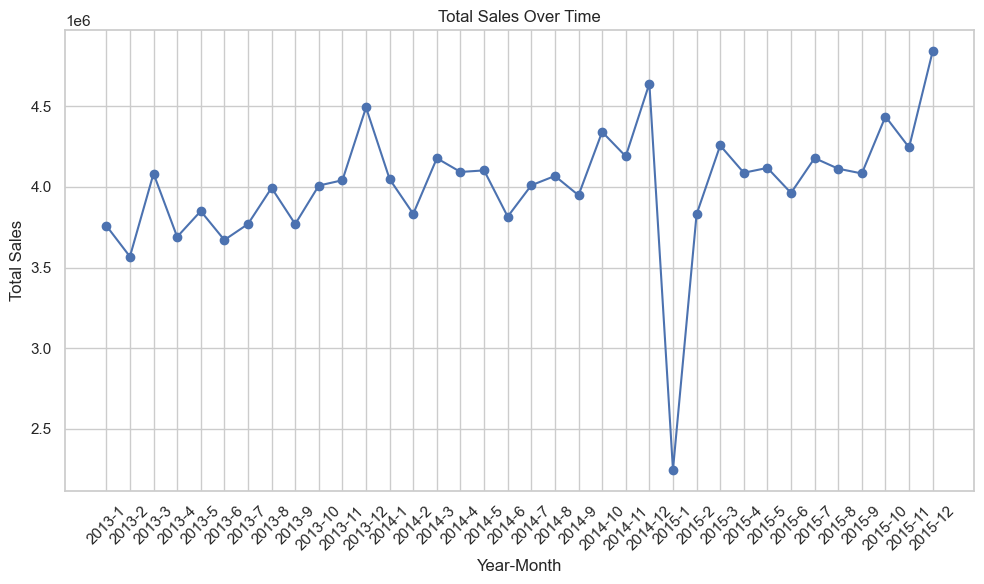

In [52]:
import matplotlib.pyplot as plt

#Set graphic size
plt.figure(figsize=(10, 6))

# Draw a line chart
plt.plot(df_total_sales['Year'].astype(str) + '-' + df_total_sales['Month'].astype(str), df_total_sales['Total_Sales'], marker='o', color='b' )

# Set title and tags
plt.title('Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')

# Set x-axis scale
plt.xticks(rotation=45)

# Show grid lines
plt.grid(True)

# Display graphics
plt.tight_layout()
plt.show()

In [53]:
total_sales

,Year,Month,Item_Value
0,2013,1,3.759612e+06
1,2013,2,3.567907e+06
2,2013,3,4.083048e+06
3,2013,4,3.690232e+06
4,2013,5,3.850134e+06
5,2013,6,3.670818e+06
6,2013,7,3.769807e+06
7,2013,8,3.994176e+06
8,2013,9,3.769630e+06
9,2013,10,4.008515e+06


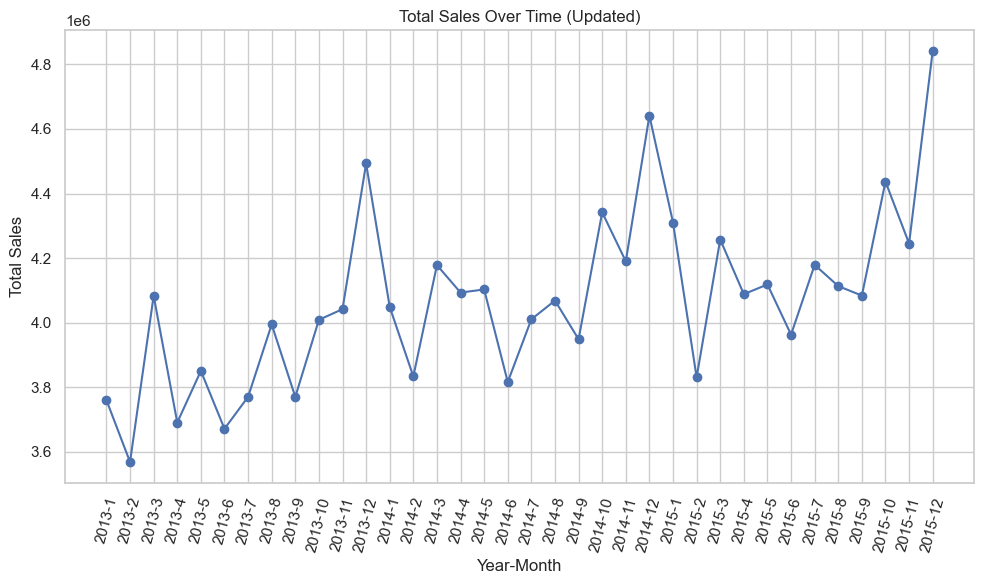

In [54]:
# Find the data rows for January 2015
jan_2015_index = df_total_sales[(df_total_sales['Year'] == 2015) & (df_total_sales['Month'] == 1)].index[0]

# Updated sales in January 2015 to be 1.92 times the original
df_total_sales.loc[jan_2015_index, 'Total_Sales'] *= 1.92

# Redraw the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_total_sales['Year'].astype(str) + '-' + df_total_sales['Month'].astype(str), df_total_sales['Total_Sales'], marker='o', color='b' )
plt.title('Total Sales Over Time (Updated)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Prepare data
# It is assumed here that df_total_sales already contains sales data for all months

# Set parameter combination
p_values = range(0, 3) # AR(p) parameter
d_values = range(0, 2) # Difference order
q_values = range(0, 3) # MA(q) parameter
parameters = list(itertools.product(p_values, d_values, q_values))

# Convert monthly sales into time series
sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))

# Fit ARIMA model and make predictions
results = []
for param in parameters:
     try:
         model = ARIMA(sales_time_series, order=param)
         fit_model = model.fit()
         forecast = fit_model.forecast(steps=3) # Forecast sales in the next 3 months
         results.append((param, forecast))
     except:
         continue

# Calculation error
errors = []
for param, forecast in results:
     forecast_values = forecast.values
     actual_values = df_total_sales['Total_Sales'][-3:].values # Actual sales (January to March 2016)
     error = mean_squared_error(actual_values, forecast_values, squared=False) # Calculate the root mean square error
     errors.append((param, error))

# Display the first 5 parameter combinations and their errors
top_5_errors = sorted(errors, key=lambda x: x[1])[:5]
print("Top 5 parameter combinations with lowest error:")
for param, error in top_5_errors:
     print("Parameters:", param, "Error:", error)

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\2958003131.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stati

Top 5 parameter combinations with lowest error:
Parameters: (1, 0, 2) Error: 297173.5790336023
Parameters: (1, 0, 1) Error: 304544.69462672755
Parameters: (2, 0, 1) Error: 307061.2027882044
Parameters: (2, 0, 0) Error: 345929.61039939773
Parameters: (2, 1, 2) Error: 351947.61788636463


C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 

In [56]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Prepare data
# It is assumed here that df_total_sales already contains sales data for all months

# Set parameter combination
p_values = range(0, 3) # AR(p) parameter
d_values = range(0, 2) # Difference order
q_values = range(0, 3) # MA(q) parameter
parameters = list(itertools.product(p_values, d_values, q_values))

# Convert monthly sales into time series
sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))

# Fit ARIMA model and make predictions
results = []
for param in parameters:
     try:
         model = ARIMA(sales_time_series, order=param)
         fit_model = model.fit()
         forecast = fit_model.forecast(steps=3) # Forecast sales in the next 3 months
         results.append((param, forecast))
     except:
         continue

# Calculate the error and output the forecast sales
print("Top 5 parameter combinations with lowest error and forecasted sales:")
for i, (param, forecast) in enumerate(results[:5], 1):
     forecast_values = forecast.values
     actual_values = df_total_sales['Total_Sales'][-3:].values # Actual sales (January to March 2016)
     error = mean_squared_error(actual_values, forecast_values, squared=False) # Calculate the root mean square error
     print(f"Parameter combination {i}: {param}, Forecasted sales: {forecast_values}, Error: {error}")

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\2791705324.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stati

Top 5 parameter combinations with lowest error and forecasted sales:
Parameter combination 1: (0, 0, 0), Forecasted sales: [4067643.90909167 4067643.90909167 4067643.90909167], Error: 505726.48259006336
Parameter combination 2: (0, 0, 1), Forecasted sales: [4252777.42807044 4067643.90909181 4067643.90909181], Error: 470745.31428246887
Parameter combination 3: (0, 0, 2), Forecasted sales: [4286312.47938223 4270894.38199451 4067643.9090918 ], Error: 455627.40590066824
Parameter combination 4: (0, 1, 0), Forecasted sales: [4841866.92 4841866.92 4841866.92], Error: 416409.5544308578
Parameter combination 5: (0, 1, 1), Forecasted sales: [4779804.74840055 4779804.74840055 4779804.74840055], Error: 368511.7146641899


C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 

In [57]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Prepare data
# It is assumed here that df_total_sales already contains sales data for all months

# Set parameter combination
p_values = range(0, 3) # AR(p) parameter
d_values = range(0, 2) # Difference order
q_values = range(0, 3) # MA(q) parameter
parameters = list(itertools.product(p_values, d_values, q_values))

# Convert monthly sales into time series
sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))

# Fit ARIMA model and make predictions
results = []
errors = []
for param in parameters:
     try:
         model = ARIMA(sales_time_series, order=param)
         fit_model = model.fit()
         forecast = fit_model.forecast(steps=3) # Forecast sales in the next 3 months
         forecast_values = forecast.values
         actual_values = df_total_sales['Total_Sales'][-3:].values # Actual sales (January to March 2016)
         error = mean_squared_error(actual_values, forecast_values, squared=False) # Calculate the root mean square error
         errors.append((param, error))
         results.append((param, forecast_values))
     except:
         continue

# Display the forecast sales and error for each month
for i, (param, forecast_values) in enumerate(results, 1):
     print(f"Parameter combination {i}: {param}")
     for j, forecasted_sales in enumerate(forecast_values):
         month=j+1
         error = errors[i - 1][1] # Corresponding error
         print(f" Forecasted sales for 2016-{month}: {forecasted_sales}, Error: {error}")

C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\3678868252.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_time_series = pd.Series(df_total_sales['Total_Sales'].values, index=pd.date_range(start='2013-01-01', periods=len(df_total_sales), freq='M'))
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regress

Parameter combination 1: (0, 0, 0)
 Forecasted sales for 2016-1: 4067643.9090916663, Error: 505726.48259006336
 Forecasted sales for 2016-2: 4067643.9090916663, Error: 505726.48259006336
 Forecasted sales for 2016-3: 4067643.9090916663, Error: 505726.48259006336
Parameter combination 2: (0, 0, 1)
 Forecasted sales for 2016-1: 4252777.428070445, Error: 470745.31428246887
 Forecasted sales for 2016-2: 4067643.9090918056, Error: 470745.31428246887
 Forecasted sales for 2016-3: 4067643.9090918056, Error: 470745.31428246887
Parameter combination 3: (0, 0, 2)
 Forecasted sales for 2016-1: 4286312.479382227, Error: 455627.40590066824
 Forecasted sales for 2016-2: 4270894.38199451, Error: 455627.40590066824
 Forecasted sales for 2016-3: 4067643.9090917986, Error: 455627.40590066824
Parameter combination 4: (0, 1, 0)
 Forecasted sales for 2016-1: 4841866.92, Error: 416409.5544308578
 Forecasted sales for 2016-2: 4841866.92, Error: 416409.5544308578
 Forecasted sales for 2016-3: 4841866.92, Erro

C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\wangj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Sales Promotion Analysis: Exploring the Impact of Price Changes on Sales Volume

数据分析步骤
1. 数据理解和预处理
理解每列数据： 确认每个字段的含义和数据类型，特别是与销售量（Quantity_Sold）、商品价值（Item_Value）、销售日期（Sale_Date）、促销活动（Offer）等相关的列。
清洗数据： 确保数据质量，例如去除或处理缺失值、异常值和重复数据。
2. 选择分析的产品
确定初始产品： 选择一个特定产品开始分析，例如罐装金枪鱼。使用 Item_Description 或 Barcode_Item 列来过滤数据集。
3. 分析单个产品的价格变动与销售量关系
提取价格信息： 对选定的产品，使用 Item_Value 和 Quantity_Sold 来计算平均售价。
跟踪价格变动： 分析该产品在一年中的价格变动趋势。根据 Sale_Date 对价格进行时间序列分析。
量化销售响应： 对比价格变动期与非变动期的销售量差异。
4. 扩展到更多产品
选择更多产品： 在方法验证有效后，选取其他产品并重复上述分析步骤。
分析和比较： 比较不同产品的价格敏感度，看看哪些产品的销售量对价格变动更敏感。
5. 统计分析
回归分析： 使用回归模型来量化价格变动对销售量的具体影响。可以考虑构建线性回归或更复杂的模型。
检验统计显著性： 确定模型的统计显著性和解释能力。
6. 报告撰写与可视化
撰写发现： 在报告中详细说明价格变动如何影响销售量，并用数据可视化支持你的结论。
提供商业见解： 根据分析结果，给出具体的商业建议，如调整定价策略或促销活动的建议。

In [81]:
df_2013_clean.columns

Index(['Sale_Date', 'Sale_Time', 'UniSA_Receipt_No1', 'Receipt_Line_No',
       'UniSA_Customer_No', 'Total_Sale_Amount_InclusiveGST',
       'Total_Receipt_Lines', 'Barcode_Item', 'Item_Description',
       'Quantity_Sold', 'Item_Value', 'Department_Name', 'Commodity_Name',
       'Offer', 'Year', 'Month'],
      dtype='object')

In [82]:
import pandas as pd

# 假设df_2013_clean已经加载到DataFrame中
# 过滤掉Quantity_Sold中的负值，创建一个新的DataFrame
df_2013_no_return = df_2013_clean[df_2013_clean['Quantity_Sold'] > 0]

# 检查新DataFrame来确认负值已经被移除
print(df_2013_no_return['Quantity_Sold'].describe())

count    1.180043e+07
mean     9.990349e-01
std      1.932855e+00
min      1.000000e-02
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+03
Name: Quantity_Sold, dtype: float64


In [83]:
import pandas as pd

df_2013_no_return = df_2013_no_return.drop(columns=[
    'Sale_Time', 'UniSA_Receipt_No1', 'Receipt_Line_No', 
    'UniSA_Customer_No', 'Total_Sale_Amount_InclusiveGST', 
    'Total_Receipt_Lines', 'Barcode_Item'
])

print(df_2013_no_return.columns)

Index(['Sale_Date', 'Item_Description', 'Quantity_Sold', 'Item_Value',
       'Department_Name', 'Commodity_Name', 'Offer', 'Year', 'Month'],
      dtype='object')


In [84]:
# 计算每个商品的销售频率
item_frequencies = df_2013_no_return['Item_Description'].value_counts()
print(item_frequencies)

Item_Description
BANANAS                           168242
BIO-DEGRADABLE BAG                149927
CARROTS PRE-PACKED   1KG           60671
MUSHROOMS                          59292
BROCCOLI                           55929
                                   ...  
MARBIG LAMINATOR 210313                1
L/BASIS CLEANSING GEL 125ML            1
ORGANIC LIMES 500G                     1
FISHING DVD                            1
DECOR T/FRESH LET&SALAD CRISPR         1
Name: count, Length: 29364, dtype: int64


In [125]:
item_frequencies.head(n = 30)

Item_Description
BANANAS                     168242
BIO-DEGRADABLE BAG          149927
CARROTS PRE-PACKED   1KG     60671
MUSHROOMS                    59292
BROCCOLI                     55929
DISCOUNT MEAT                51915
CONTINENTAL CUCUMBER         51770
F/LAND JUMBO WHITE 700G      51440
BROWN ONIONS                 48242
LEADER                       47842
RED CAPSICUMS                40968
DAIRY MARKDOWNS              35606
BAKERY MARKDOWN              35455
LETTUCE                      33908
FOODLAND WHOLE MILK 3LT      33421
FOODLAND MILK R/F  3LT       33419
PREM BEEF MINCE NO PRES      33055
CHICKEN BREAST FILLET        31573
STEM TOMATOES                31438
AVOCADO                      31148
FOODLAND R/FAT MILK  2LT     30397
CARROTS LOOSE                29673
ZUCCHINI                     29421
STRAWBERRIES   PUNNET        29407
MARKDOWN FRUIT & VEG         29365
WHITE GRAPES                 28213
MEGGLES CAGE EGGS  700G      27501
STRAWBERRIES PUNNET 250G     27280
TOM

In [85]:
# 计算每个商品的总销售额
total_sales_per_item = df_2013_no_return.groupby('Item_Description')['Item_Value'].sum().sort_values(ascending=False)
print(total_sales_per_item)

Item_Description
BANANAS                      545581.40
CHICKEN BREAST FILLET        318559.39
DISCOUNT MEAT                256848.60
PREM BEEF MINCE NO PRES      227257.38
BEEF MINCE NO PRES  ADD      171845.94
                               ...    
ANIMAL WORLD PARTY CANDLE         0.00
COUPON OFFER 11                   0.00
COUPON OFFER 8                    0.00
SOUTHERN ARGUS                    0.00
STOCK JOURNAL                     0.00
Name: Item_Value, Length: 29364, dtype: float64


## Bananas

可以发现无论是销量还是总销售额，都是BANANAS最高，所以这里首先采用BANANAS来进行分析。

In [124]:
import pandas as pd

# 假设 df_2013_no_return 已经是一个加载好的DataFrame
# 筛选出所有与"BANANAS"相关的记录
df_2013_bananas = df_2013_no_return[df_2013_no_return['Item_Description'] == 'BANANAS']

# 查看新DataFrame的前几行，确保数据正确提取
print(df_2013_bananas.head(n = 20))

      Sale_Date Item_Description  Quantity_Sold  Item_Value Department_Name  \
36   2013-01-02          BANANAS           1.03        3.39     FRUIT & VEG   
79   2013-01-02          BANANAS           0.98        3.21     FRUIT & VEG   
107  2013-01-02          BANANAS           0.98        3.21     FRUIT & VEG   
226  2013-01-02          BANANAS           1.06        3.47     FRUIT & VEG   
340  2013-01-02          BANANAS           1.18        3.87     FRUIT & VEG   
357  2013-01-02          BANANAS           1.72        5.64     FRUIT & VEG   
450  2013-01-02          BANANAS           1.04        3.42     FRUIT & VEG   
457  2013-01-02          BANANAS           0.25        0.82     FRUIT & VEG   
479  2013-01-02          BANANAS           0.84        2.76     FRUIT & VEG   
493  2013-01-02          BANANAS           1.22        4.01     FRUIT & VEG   
546  2013-01-02          BANANAS           0.48        1.58     FRUIT & VEG   
575  2013-01-02          BANANAS           0.51     

In [87]:
# 删除指定列
df_2013_bananas = df_2013_bananas.drop(columns=['Item_Description', 'Department_Name', 'Commodity_Name', 'Year', 'Month'])

# 打印新DataFrame的前几行，以确保指定列已被删除
print(df_2013_bananas.head())

     Sale_Date  Quantity_Sold  Item_Value Offer
36  2013-01-02           1.03        3.39    NO
79  2013-01-02           0.98        3.21    NO
107 2013-01-02           0.98        3.21    NO
226 2013-01-02           1.06        3.47    NO
340 2013-01-02           1.18        3.87    NO


**Price_Unit**

使用Item_Value和Quantity Sold来计算Price_Unit的值。

In [88]:
import pandas as pd

# 计算每单位的价格，结果保留两位小数，并将其作为新列添加到DataFrame中
df_2013_bananas['Price_Unit'] = (df_2013_bananas['Item_Value'] / df_2013_bananas['Quantity_Sold']).round(2)

# 查看更新后的DataFrame，确认新列已正确添加并格式化
print(df_2013_bananas.head())

     Sale_Date  Quantity_Sold  Item_Value Offer  Price_Unit
36  2013-01-02           1.03        3.39    NO        3.29
79  2013-01-02           0.98        3.21    NO        3.28
107 2013-01-02           0.98        3.21    NO        3.28
226 2013-01-02           1.06        3.47    NO        3.27
340 2013-01-02           1.18        3.87    NO        3.28


In [89]:
# 使用groupby按日期分组，计算每天的最低价格，并将结果赋值回每个原记录
df_2013_bananas['Price_Unit'] = df_2013_bananas.groupby('Sale_Date')['Price_Unit'].transform('min')

# 查看更新后的DataFrame以确认最低价格已替换原价格
print(df_2013_bananas[['Sale_Date', 'Price_Unit']].head())

     Sale_Date  Price_Unit
36  2013-01-02         3.2
79  2013-01-02         3.2
107 2013-01-02         3.2
226 2013-01-02         3.2
340 2013-01-02         3.2


In [90]:
# 获取Price_Unit列的不同值
unique_price_units = df_2013_bananas['Price_Unit'].unique()

# 打印不同值
print(unique_price_units)

[3.2  2.   3.19 3.21 1.95 1.94 1.   1.9  3.26 3.38 3.4  3.39 3.41 3.68
 3.7  3.72 3.71 3.89 3.86 3.88 4.83 4.84 4.82 4.81 4.8  4.79 4.29 4.77
 3.87 2.86 2.83 2.82 2.85 3.9  3.82 3.85 2.59 2.62 2.57 2.4  2.6  2.58
 2.55 2.87 2.88 2.91 2.89 1.93 1.92 1.91 3.36 3.33 3.67 3.69 3.64 3.62
 3.   3.25 2.94 3.78 3.76 3.79 3.73 3.57 3.75 3.8  2.9  1.96 3.92 3.91
 1.99 1.43 2.5  2.33 1.78 1.82 2.92 1.63 1.62 1.64 2.98 3.22 3.42 3.43]


In [91]:
def adjust_price(value):
    # 取第二位小数
    second_decimal = int(value * 100) % 10
    
    # 根据第二位小数的值进行调整
    if second_decimal < 2:
        return round(value, 1)  # 更接近0，修改为0
    elif second_decimal < 7:
        return round(value, 1) + 0.05  # 更接近5，修改为5
    else:
        return round(value + 0.1, 1)  # 更接近10，进一位

# 将adjust_price函数应用于Price_Unit列中的每个值
df_2013_bananas['Price_Unit'] = df_2013_bananas['Price_Unit'].apply(adjust_price)

# 打印更新后的Price_Unit列
print(df_2013_bananas['Price_Unit'].unique())

[3.2  2.   3.3  1.95 1.   1.9  3.35 3.5  3.4  3.8  3.7  3.75 4.   3.95
 4.85 4.8  4.9  4.4  2.95 2.85 3.9  3.85 2.7  2.65 2.4  2.6  2.55 3.
 2.9  3.45 3.65 3.25 2.05 2.1  1.45 2.5  2.35 1.85 1.65 3.1 ]


可以发现offer的情况是以一整天来进行的：

In [92]:
import pandas as pd

# 按日期和促销状态分组，计算每组的数量
offer_variation = df_2013_bananas.groupby(['Sale_Date', 'Offer']).size().reset_index(name='Count')

# 查找在同一天内有多种Offer状态的日期
multiple_offers = offer_variation['Sale_Date'].duplicated(keep=False)

# 打印出存在多种Offer状态的日期和详情
print(offer_variation[multiple_offers].sort_values(by='Sale_Date'))

Empty DataFrame
Columns: [Sale_Date, Offer, Count]
Index: []


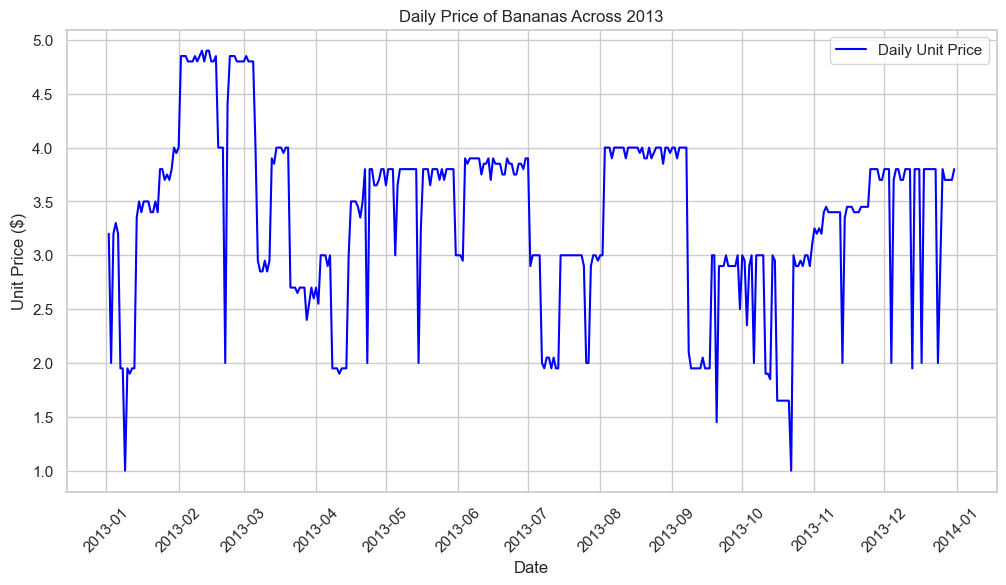

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 确保Sale_Date是日期类型，用于时间序列图
df_2013_bananas['Sale_Date'] = pd.to_datetime(df_2013_bananas['Sale_Date'])

# 按日期分组，计算每日的平均单位价格
daily_price = df_2013_bananas.groupby('Sale_Date')['Price_Unit'].mean().reset_index()

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制时间序列图
ax.plot(daily_price['Sale_Date'], daily_price['Price_Unit'], label='Daily Unit Price', color='blue')

# 设置图表标题和轴标签
ax.set_title('Daily Price of Bananas Across 2013')  # 图标题
ax.set_xlabel('Date')  # X轴标签
ax.set_ylabel('Unit Price ($)')  # Y轴标签

# 设置网格
ax.grid(True)

# 设置x轴主要刻度为每个月并格式化日期显示
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转日期标记以避免重叠
plt.xticks(rotation=45)

# 显示图例
ax.legend()

# 显示图形
plt.show()

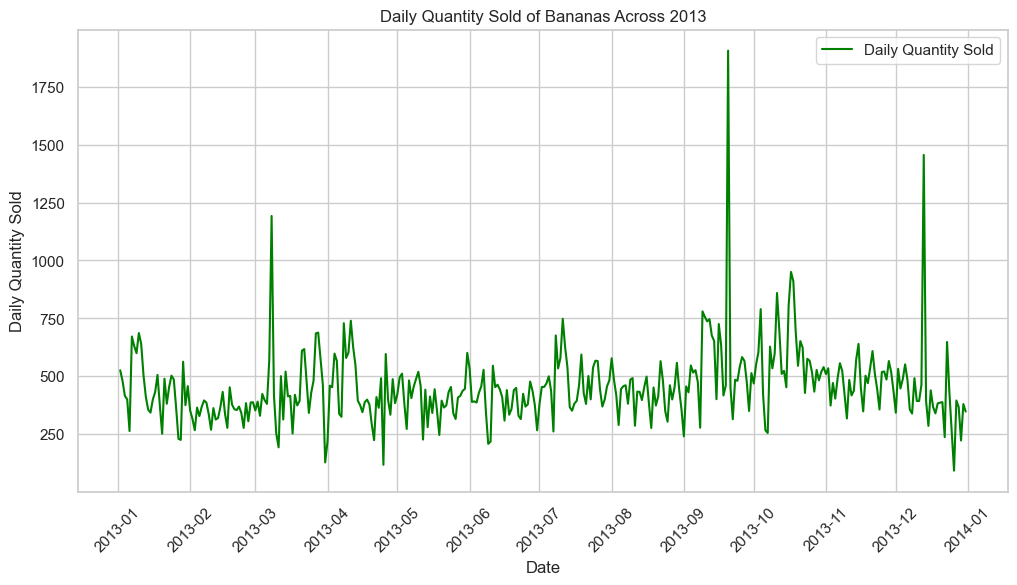

In [94]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 按日期分组，计算每日的总销售数量
daily_quantity_sold = df_2013_bananas.groupby('Sale_Date')['Quantity_Sold'].sum().reset_index()

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制时间序列图
ax.plot(daily_quantity_sold['Sale_Date'], daily_quantity_sold['Quantity_Sold'], label='Daily Quantity Sold', color='green')

# 设置图表标题和轴标签
ax.set_title('Daily Quantity Sold of Bananas Across 2013')  # 图标题
ax.set_xlabel('Date')  # X轴标签
ax.set_ylabel('Daily Quantity Sold')  # Y轴标签

# 设置网格
ax.grid(True)

# 设置x轴主要刻度为每个月并格式化日期显示
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转日期标记以避免重叠
plt.xticks(rotation=45)

# 显示图例
ax.legend()

# 显示图形
plt.show()

In [95]:
import pandas as pd

# 按价格分组计算总销量
price_sales = df_2013_bananas.groupby('Price_Unit')['Quantity_Sold'].sum().reset_index()

In [96]:
price_sales

,Price_Unit,Quantity_Sold
0,1.00,1223.00
1,1.45,1906.14
2,1.65,4560.98
3,1.85,509.84
4,1.90,2935.35
5,1.95,15622.98
6,2.00,4868.98
7,2.05,2391.62
8,2.10,277.59
9,2.35,603.37


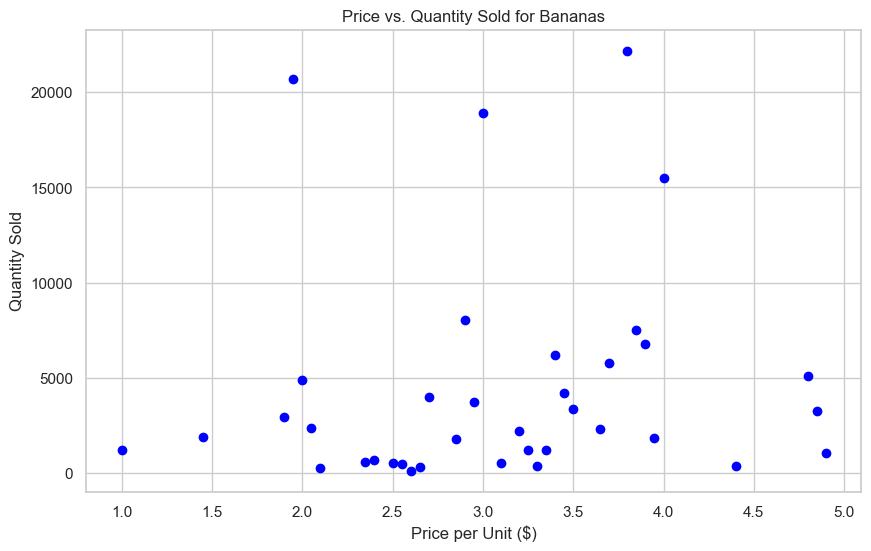

In [97]:
import matplotlib.pyplot as plt

# 数据：价格单位与相应的销量
price_units = [
    1.00, 1.45, 1.90, 1.95, 2.00, 2.05, 2.10, 2.35, 2.40, 2.50, 
    2.55, 2.60, 2.65, 2.70, 2.85, 2.90, 2.95, 3.00, 3.10, 3.20, 
    3.25, 3.30, 3.35, 3.40, 3.45, 3.50, 3.65, 3.70, 3.80, 3.85, 
    3.90, 3.95, 4.00, 4.40, 4.80, 4.85, 4.90
]
quantities_sold = [
    1223.00, 1906.14, 2935.35, 20693.80, 4868.98, 2391.62, 277.59, 603.37, 
    688.34, 513.26, 459.03, 127.80, 341.43, 3979.53, 1803.23, 8027.18, 
    3715.73, 18884.95, 539.35, 2208.62, 1223.49, 399.97, 1219.96, 6224.17, 
    4223.19, 3391.54, 2293.40, 5801.38, 22167.80, 7512.21, 6767.89, 1856.85, 
    15497.61, 368.92, 5089.41, 3271.14, 1047.62
]

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(price_units, quantities_sold, color='blue')
plt.title('Price vs. Quantity Sold for Bananas')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

从散点图中，我们可以看到价格与销量之间的关系并非完全直线性。在某些价格点上，销量呈现出明显的波动。特别是在价格较低时，销量似乎比价格较高时更高，这符合常识——价格越低，消费者购买的意愿通常越强。

下一步，我们可以使用线性回归来更精确地量化价格变化对销量的影响。线性回归将帮助我们理解在保持其他因素不变的情况下，价格每变化一个单位，销量平均会如何变化。让我们进行这个分析。 ​​

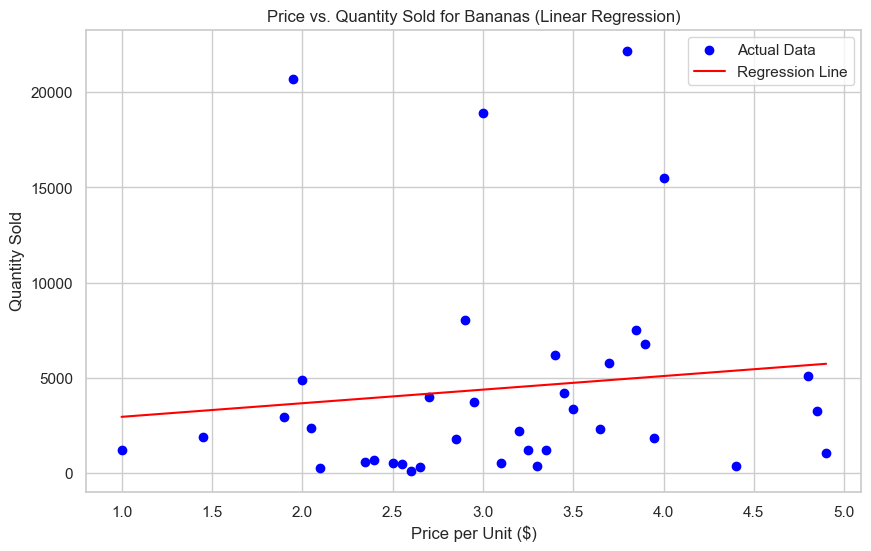

(713.7233003306093, 2243.296295600755)

In [98]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 将数据转换为NumPy数组以用于线性回归
X = np.array(price_units).reshape(-1, 1)
y = np.array(quantities_sold)

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 获取回归线的系数和截距
coefficient = model.coef_[0]
intercept = model.intercept_

# 使用模型预测
predicted_quantities = model.predict(X)

# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
plt.scatter(price_units, quantities_sold, color='blue', label='Actual Data')
plt.plot(price_units, predicted_quantities, color='red', label='Regression Line')
plt.title('Price vs. Quantity Sold for Bananas (Linear Regression)')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

coefficient, intercept

在线性回归模型中，我们得到了以下结果：

斜率（系数）：约 713.72。这表示每当价格上涨1美元时，销量平均增加约714个单位。

截距：约 2243.30。这表示如果价格为零（理论上），预测的平均销量为2243个单位。

结果解释

正向斜率的意义：在本案例中，价格与销量之间的正相关关系（即价格上升，销量也上升）可能有些违反直觉，因为我们通常期待价格上升会导致销量下降。然而，这种关系可能受到以下因素的影响：

市场动态：在某些情况下，价格可能与需求量高的时间段（如节假日或促销活动）对应，这时即使价格上升，销量也可能因为整体市场需求的增加而增长。

产品感知：对于某些消费者来说，价格高可能被视为品质的指示，从而增加购买意愿。

商业策略：

定价策略：如果香蕉价格的提高确实不影响销量下降，商家可能会考虑适当提高价格以增加利润，尤其是在需求旺盛时。

市场监控：商家应持续监控销量与价格的关系，以确保定价策略能适应市场变化。

注意事项

数据外的因素：这个模型假定只有价格影响销量，实际上还可能有其他很多因素影响销量，如市场营销活动、季节变化、供应链效率等。

数据的代表性：如果这些数据只来自特定时间或特定市场，那么模型的预测可能不适用于其他情况。

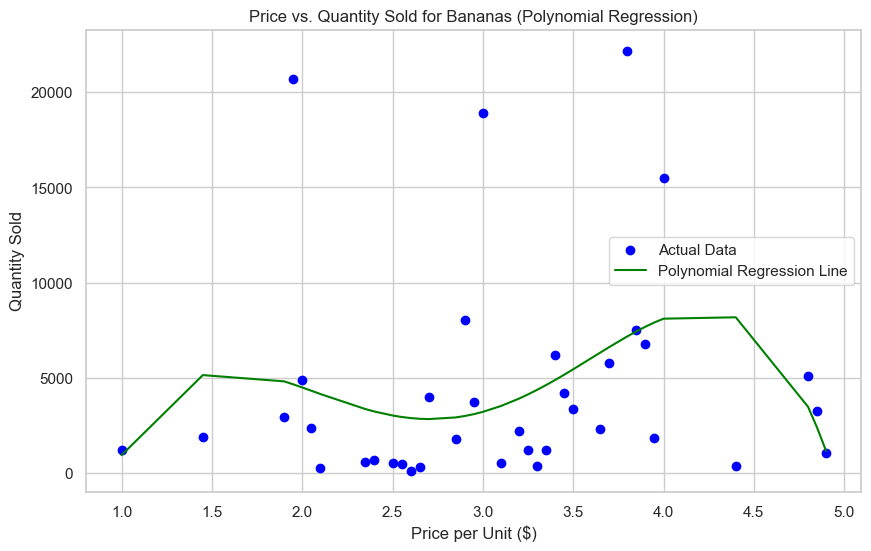

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 设置多项式回归模型，这里选择二次多项式
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 训练模型
poly_model.fit(X, y)

# 使用模型进行预测
predicted_quantities_poly = poly_model.predict(X)

# 绘制散点图和多项式回归线
plt.figure(figsize=(10, 6))
plt.scatter(price_units, quantities_sold, color='blue', label='Actual Data')
plt.plot(price_units, predicted_quantities_poly, color='green', label='Polynomial Regression Line')
plt.title('Price vs. Quantity Sold for Bananas (Polynomial Regression)')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()

## CHICKEN BREAST FILLET

In [108]:
import pandas as pd

# 假设 df_2013_no_return 已经是一个加载好的DataFrame
# 筛选出所有与"BANANAS"相关的记录
df_2013_chicken = df_2013_no_return[df_2013_no_return['Item_Description'] == 'CHICKEN BREAST FILLET']

# 查看新DataFrame的前几行，确保数据正确提取
print(df_2013_chicken.head())

      Sale_Date       Item_Description  Quantity_Sold  Item_Value  \
997  2013-01-02  CHICKEN BREAST FILLET           0.86        8.12   
1774 2013-01-02  CHICKEN BREAST FILLET           1.33       12.62   
2106 2013-01-02  CHICKEN BREAST FILLET           0.95        9.02   
2107 2013-01-02  CHICKEN BREAST FILLET           1.02        9.64   
2501 2013-01-02  CHICKEN BREAST FILLET           0.24        3.16   

     Department_Name Commodity_Name Offer  Year  Month  
997       FRESH MEAT        POULTRY    NO  2013      1  
1774      FRESH MEAT        POULTRY    NO  2013      1  
2106      FRESH MEAT        POULTRY    NO  2013      1  
2107      FRESH MEAT        POULTRY    NO  2013      1  
2501      FRESH MEAT        POULTRY    NO  2013      1  


In [109]:
# 删除指定列
df_2013_chicken = df_2013_chicken.drop(columns=['Item_Description', 'Department_Name', 'Commodity_Name', 'Year', 'Month'])

# 打印新DataFrame的前几行，以确保指定列已被删除
print(df_2013_chicken.head())

      Sale_Date  Quantity_Sold  Item_Value Offer
997  2013-01-02           0.86        8.12    NO
1774 2013-01-02           1.33       12.62    NO
2106 2013-01-02           0.95        9.02    NO
2107 2013-01-02           1.02        9.64    NO
2501 2013-01-02           0.24        3.16    NO


In [110]:
import pandas as pd

# 计算每单位的价格，结果保留两位小数，并将其作为新列添加到DataFrame中
df_2013_chicken['Price_Unit'] = (df_2013_chicken['Item_Value'] / df_2013_chicken['Quantity_Sold']).round(2)

# 查看更新后的DataFrame，确认新列已正确添加并格式化
print(df_2013_chicken.head())

      Sale_Date  Quantity_Sold  Item_Value Offer  Price_Unit
997  2013-01-02           0.86        8.12    NO        9.44
1774 2013-01-02           1.33       12.62    NO        9.49
2106 2013-01-02           0.95        9.02    NO        9.49
2107 2013-01-02           1.02        9.64    NO        9.45
2501 2013-01-02           0.24        3.16    NO       13.17


In [111]:
# 使用groupby按日期分组，计算每天的最低价格，并将结果赋值回每个原记录
df_2013_chicken['Price_Unit'] = df_2013_chicken.groupby('Sale_Date')['Price_Unit'].transform('min')

# 查看更新后的DataFrame以确认最低价格已替换原价格
print(df_2013_chicken[['Sale_Date', 'Price_Unit']].head())

      Sale_Date  Price_Unit
997  2013-01-02        9.44
1774 2013-01-02        9.44
2106 2013-01-02        9.44
2107 2013-01-02        9.44
2501 2013-01-02        9.44


In [112]:
# 获取Price_Unit列的不同值
unique_price_units = df_2013_chicken['Price_Unit'].unique()

# 打印不同值
print(unique_price_units)

[ 9.44  9.45  9.46 12.82 12.77 12.74 12.89 12.76 12.78 12.86  9.71  9.7
 12.81 12.83  8.94  8.93  9.69 12.91 12.93 12.84 12.85 12.92 12.79  9.73
  9.74  9.75 12.87 12.8  12.94 12.88 12.71  7.96  7.95  9.68  9.94  8.95
  9.72 12.73 12.9   7.94  8.96  6.95  6.96  9.96  9.95  7.92  8.75  8.74
  8.77  8.76  8.92  8.91  8.9   8.89 12.72  8.32  8.41  8.4  12.61]


In [113]:
def adjust_price(value):
    # 取第二位小数
    second_decimal = int(value * 100) % 10
    
    # 根据第二位小数的值进行调整
    if second_decimal < 2:
        return round(value, 1)  # 更接近0，修改为0
    elif second_decimal < 7:
        return round(value, 1) + 0.05  # 更接近5，修改为5
    else:
        return round(value + 0.1, 1)  # 更接近10，进一位

# 将adjust_price函数应用于Price_Unit列中的每个值
df_2013_chicken['Price_Unit'] = df_2013_chicken['Price_Unit'].apply(adjust_price)

# 打印更新后的Price_Unit列
print(df_2013_chicken['Price_Unit'].unique())

[ 9.45  9.55 12.85 12.9  12.75 13.   12.95  9.7   9.8  12.8   8.95  9.75
  9.85 12.7   8.05  9.95  7.95  9.05  7.05 10.05  8.85  8.75  8.9   9.
  8.35  8.4  12.6 ]


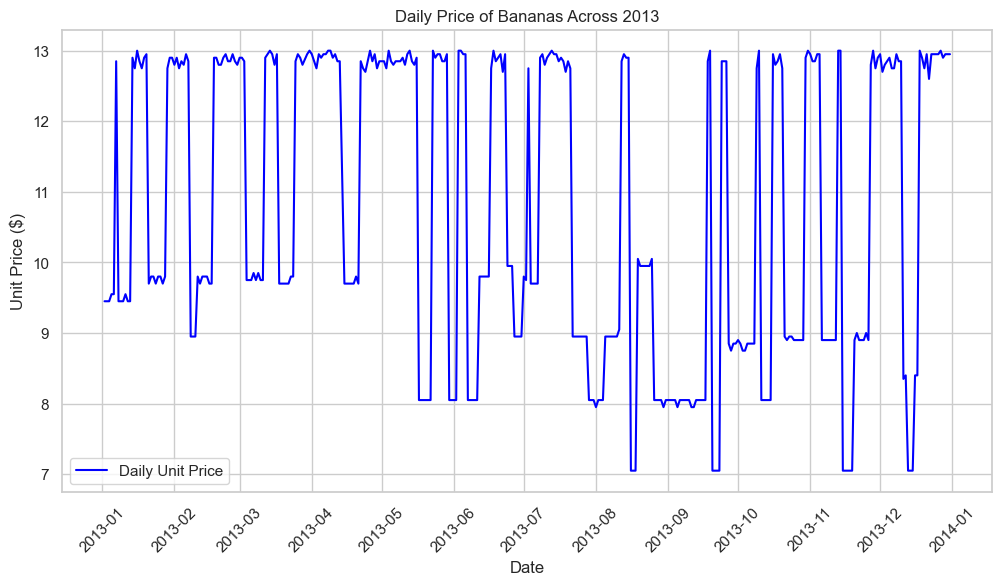

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 确保Sale_Date是日期类型，用于时间序列图
df_2013_chicken['Sale_Date'] = pd.to_datetime(df_2013_chicken['Sale_Date'])

# 按日期分组，计算每日的平均单位价格
daily_price = df_2013_chicken.groupby('Sale_Date')['Price_Unit'].mean().reset_index()

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制时间序列图
ax.plot(daily_price['Sale_Date'], daily_price['Price_Unit'], label='Daily Unit Price', color='blue')

# 设置图表标题和轴标签
ax.set_title('Daily Price of Bananas Across 2013')  # 图标题
ax.set_xlabel('Date')  # X轴标签
ax.set_ylabel('Unit Price ($)')  # Y轴标签

# 设置网格
ax.grid(True)

# 设置x轴主要刻度为每个月并格式化日期显示
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转日期标记以避免重叠
plt.xticks(rotation=45)

# 显示图例
ax.legend()

# 显示图形
plt.show()

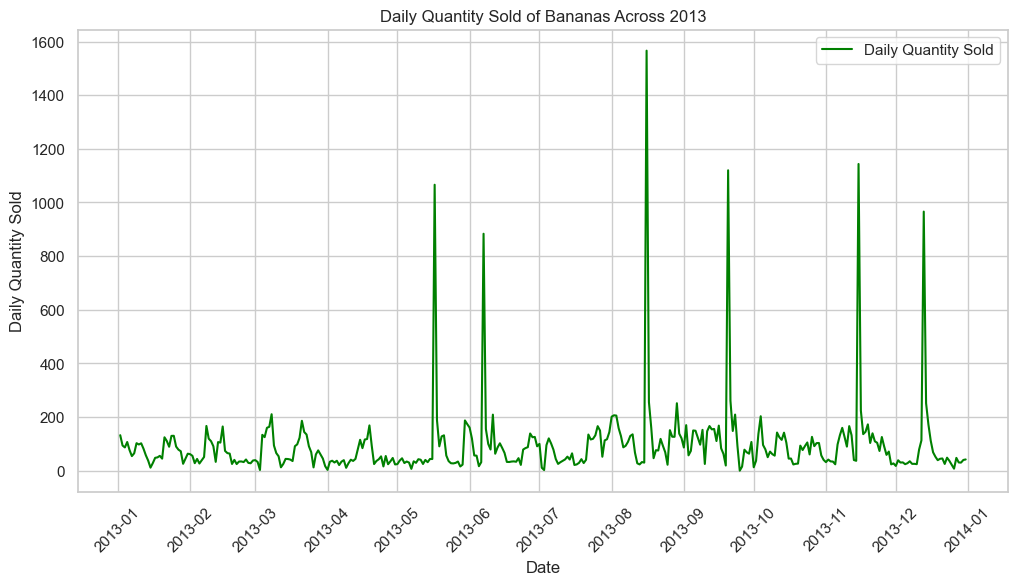

In [115]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 按日期分组，计算每日的总销售数量
daily_quantity_sold = df_2013_chicken.groupby('Sale_Date')['Quantity_Sold'].sum().reset_index()

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制时间序列图
ax.plot(daily_quantity_sold['Sale_Date'], daily_quantity_sold['Quantity_Sold'], label='Daily Quantity Sold', color='green')

# 设置图表标题和轴标签
ax.set_title('Daily Quantity Sold of Bananas Across 2013')  # 图标题
ax.set_xlabel('Date')  # X轴标签
ax.set_ylabel('Daily Quantity Sold')  # Y轴标签

# 设置网格
ax.grid(True)

# 设置x轴主要刻度为每个月并格式化日期显示
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转日期标记以避免重叠
plt.xticks(rotation=45)

# 显示图例
ax.legend()

# 显示图形
plt.show()

In [116]:
import pandas as pd

# 按价格分组计算总销量
price_sales = df_2013_chicken.groupby('Price_Unit')['Quantity_Sold'].sum().reset_index()

In [117]:
price_sales

,Price_Unit,Quantity_Sold
0,7.05,6931.94
1,7.95,804.10
2,8.05,7691.13
3,8.35,78.94
4,8.40,293.75
5,8.75,408.65
6,8.85,583.68
7,8.90,1962.16
8,8.95,2721.75
9,9.00,265.25


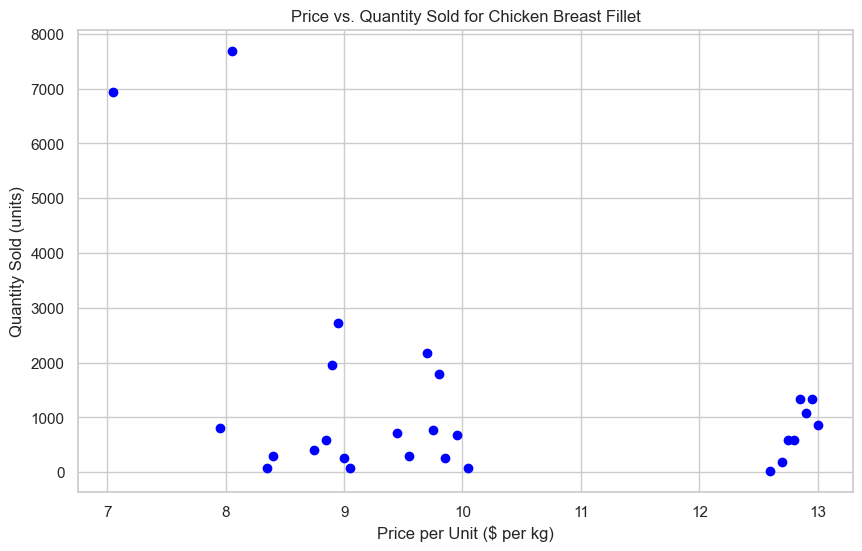

In [118]:
# 重新导入绘图库和数据后，重新绘制散点图
import matplotlib.pyplot as plt

# 鸡胸肉片的价格与销量数据
chicken_price_units = [
    7.05, 7.95, 8.05, 8.35, 8.40, 8.75, 8.85, 8.90, 8.95, 9.00, 
    9.05, 9.45, 9.55, 9.70, 9.75, 9.80, 9.85, 9.95, 10.05, 
    12.60, 12.70, 12.75, 12.80, 12.85, 12.90, 12.95, 13.00
]
chicken_quantities_sold = [
    6931.94, 804.10, 7691.13, 78.94, 293.75, 408.65, 583.68, 1962.16, 
    2721.75, 265.25, 67.72, 718.68, 286.34, 2173.95, 760.58, 1783.81, 
    257.94, 684.11, 69.15, 25.36, 182.57, 585.78, 592.34, 1331.82, 
    1087.66, 1338.96, 863.36
]

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(chicken_price_units, chicken_quantities_sold, color='blue')
plt.title('Price vs. Quantity Sold for Chicken Breast Fillet')
plt.xlabel('Price per Unit ($ per kg)')
plt.ylabel('Quantity Sold (units)')
plt.grid(True)
plt.show()

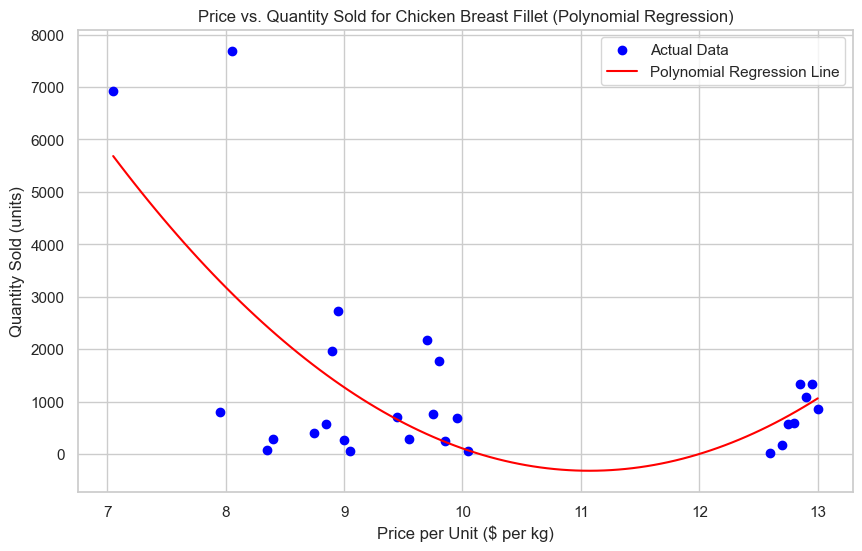

In [119]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 将数据转换为NumPy数组以用于回归分析
X_chicken = np.array(chicken_price_units).reshape(-1, 1)
y_chicken = np.array(chicken_quantities_sold)

# 创建并训练二次多项式回归模型
poly_model_chicken = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model_chicken.fit(X_chicken, y_chicken)

# 使用模型进行预测
X_fit = np.linspace(min(chicken_price_units), max(chicken_price_units), 100).reshape(-1, 1)
y_fit = poly_model_chicken.predict(X_fit)

# 绘制散点图和多项式回归线
plt.figure(figsize=(10, 6))
plt.scatter(chicken_price_units, chicken_quantities_sold, color='blue', label='Actual Data')
plt.plot(X_fit, y_fit, color='red', label='Polynomial Regression Line')
plt.title('Price vs. Quantity Sold for Chicken Breast Fillet (Polynomial Regression)')
plt.xlabel('Price per Unit ($ per kg)')
plt.ylabel('Quantity Sold (units)')
plt.legend()
plt.grid(True)
plt.show()

In [123]:
df_2013_no_return

,Sale_Date,Item_Description,Quantity_Sold,Item_Value,Department_Name,Commodity_Name,Offer,Year,Month
0,2013-01-02,FARM/UNION YGT GREEK HONEY170G,1.0,1.95,DAIRY,"MILK , MILK DRINKS AND CUSTARD",NO,2013,1
1,2013-01-02,FARM/UNION YGT GREEK HONEY170G,1.0,1.95,DAIRY,"MILK , MILK DRINKS AND CUSTARD",NO,2013,1
2,2013-01-02,ADVERTISER,1.0,1.20,VARIETY,NEWSPAPER,NO,2013,1
3,2013-01-02,PUMP PURE WATER 1.25L,1.0,3.49,GROCERY,NON-AERATED DRINKS AND POWDERS,NO,2013,1
4,2013-01-02,BALF ANZAC COOKIE 100G,1.0,1.99,BAKERY,BALFOURS,NO,2013,1
...,...,...,...,...,...,...,...,...,...
12526003,2013-12-31,WHISKAS OCEAN FISH PLATT 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526004,2013-12-31,WHISKAS OCEAN FISH PLATT 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526005,2013-12-31,WHISKAS SARDINE & TUNA 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526006,2013-12-31,WHISKAS SARDINE & TUNA 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12


In [141]:
import pandas as pd

# 假设 df_2013_no_return 已经是一个加载好的DataFrame
# 筛选出所有与"BANANAS"相关的记录
df_2013_jumbo = df_2013_no_return[df_2013_no_return['Item_Description'] == 'F/LAND JUMBO WHITE 700G']

# 查看新DataFrame的前几行，确保数据正确提取
print(df_2013_jumbo.head())

      Sale_Date         Item_Description  Quantity_Sold  Item_Value  \
9    2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
136  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
449  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
574  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
1284 2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   

     Department_Name     Commodity_Name Offer  Year  Month  
9             BAKERY  TIP TOP/BUTTERCUP    NO  2013      1  
136           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1  
449           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1  
574           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1  
1284          BAKERY  TIP TOP/BUTTERCUP    NO  2013      1  


In [142]:
import pandas as pd

# 计算每单位的价格，结果保留两位小数，并将其作为新列添加到DataFrame中
df_2013_jumbo['Price_Unit'] = (df_2013_jumbo['Item_Value'] / df_2013_jumbo['Quantity_Sold']).round(3)

# 查看更新后的DataFrame，确认新列已正确添加并格式化
print(df_2013_jumbo.head())

      Sale_Date         Item_Description  Quantity_Sold  Item_Value  \
9    2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
136  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
449  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
574  2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   
1284 2013-01-02  F/LAND JUMBO WHITE 700G            1.0        2.49   

     Department_Name     Commodity_Name Offer  Year  Month  Price_Unit  
9             BAKERY  TIP TOP/BUTTERCUP    NO  2013      1        2.49  
136           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1        2.49  
449           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1        2.49  
574           BAKERY  TIP TOP/BUTTERCUP    NO  2013      1        2.49  
1284          BAKERY  TIP TOP/BUTTERCUP    NO  2013      1        2.49  


C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\192416467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_jumbo['Price_Unit'] = (df_2013_jumbo['Item_Value'] / df_2013_jumbo['Quantity_Sold']).round(3)


In [143]:
# 使用groupby按日期分组，计算每天的最低价格，并将结果赋值回每个原记录
df_2013_jumbo['Price_Unit'] = df_2013_jumbo.groupby('Sale_Date')['Price_Unit'].transform('min')

# 查看更新后的DataFrame以确认最低价格已替换原价格
print(df_2013_jumbo[['Sale_Date', 'Price_Unit']].head())

      Sale_Date  Price_Unit
9    2013-01-02        2.49
136  2013-01-02        2.49
449  2013-01-02        2.49
574  2013-01-02        2.49
1284 2013-01-02        2.49


C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\1662163824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_jumbo['Price_Unit'] = df_2013_jumbo.groupby('Sale_Date')['Price_Unit'].transform('min')


In [135]:
# 获取Price_Unit列的不同值
unique_price_units = df_2013_jumbo['Price_Unit'].unique()

# 打印不同值
print(unique_price_units)

[2.49 1.89 1.99]


In [137]:
def adjust_price(value):
    # 取第二位小数
    second_decimal = int(value * 100) % 10
    
    # 根据第二位小数的值进行调整
    if second_decimal < 2:
        return round(value, 1)  # 更接近0，修改为0
    elif second_decimal < 7:
        return round(value, 1) + 0.05  # 更接近5，修改为5
    else:
        return round(value + 0.1, 1)  # 更接近10，进一位

# 将adjust_price函数应用于Price_Unit列中的每个值
df_2013_jumbo['Price_Unit'] = df_2013_jumbo['Price_Unit'].apply(adjust_price)

# 打印更新后的Price_Unit列
print(df_2013_jumbo['Price_Unit'].unique())

[2.6 2.  2.1]


C:\Users\wangj\AppData\Local\Temp\ipykernel_16448\4250069512.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013_jumbo['Price_Unit'] = df_2013_jumbo['Price_Unit'].apply(adjust_price)


In [138]:
import pandas as pd

# 按价格分组计算总销量
price_sales = df_2013_jumbo.groupby('Price_Unit')['Quantity_Sold'].sum().reset_index()

In [139]:
price_sales

,Price_Unit,Quantity_Sold
0,2.0,3699.0
1,2.1,1555.0
2,2.6,50169.0


# 重新分析

In [144]:
df_2013_no_return

,Sale_Date,Item_Description,Quantity_Sold,Item_Value,Department_Name,Commodity_Name,Offer,Year,Month
0,2013-01-02,FARM/UNION YGT GREEK HONEY170G,1.0,1.95,DAIRY,"MILK , MILK DRINKS AND CUSTARD",NO,2013,1
1,2013-01-02,FARM/UNION YGT GREEK HONEY170G,1.0,1.95,DAIRY,"MILK , MILK DRINKS AND CUSTARD",NO,2013,1
2,2013-01-02,ADVERTISER,1.0,1.20,VARIETY,NEWSPAPER,NO,2013,1
3,2013-01-02,PUMP PURE WATER 1.25L,1.0,3.49,GROCERY,NON-AERATED DRINKS AND POWDERS,NO,2013,1
4,2013-01-02,BALF ANZAC COOKIE 100G,1.0,1.99,BAKERY,BALFOURS,NO,2013,1
...,...,...,...,...,...,...,...,...,...
12526003,2013-12-31,WHISKAS OCEAN FISH PLATT 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526004,2013-12-31,WHISKAS OCEAN FISH PLATT 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526005,2013-12-31,WHISKAS SARDINE & TUNA 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12
12526006,2013-12-31,WHISKAS SARDINE & TUNA 400GM,1.0,0.99,GROCERY,CAT FOOD CANNED,NO,2013,12


In [145]:
import pandas as pd

# 假设 df_2013_no_return 是您已经加载的 DataFrame
# 按部门和商品名称分组，计算每种商品的总销售额
grouped = df_2013_no_return.groupby(['Department_Name', 'Item_Description'])['Item_Value'].sum().reset_index()

# 重新分组，按部门分组，并找到每个部门中销售额最高的商品
result = grouped.loc[grouped.groupby('Department_Name')['Item_Value'].idxmax()]

# 显示结果
result = result[['Department_Name', 'Item_Description', 'Item_Value']]

In [146]:
result

,Department_Name,Item_Description,Item_Value
431,BAKERY,F/LAND JUMBO WHITE 700G,135006.37
1215,Corporate Merch,DAFFODIL DAY PEN,84.00
1926,DAIRY,FOODLAND WHOLE MILK 3LT,129161.40
3245,DELI,CHICKEN BBQ SEASONED HOT,165803.19
4132,Dept:0,COCA COLA 6X330ML,89.76
4157,EPAY,PRE-PAID PLUS $30,38130.00
4187,EXPENSE,CAD CHERRY RIPE BURST 50GM,1645.69
4224,FL GIFT CARD,FOODLAND GIFT CARD,80.01
4374,FRESH MEAT,CHICKEN BREAST FILLET,318559.39
5322,FROZEN,G/NORTH I/CRM C/STYLE VAN 5L,37805.90


In [194]:
import pandas as pd

# 假设 df_2013_no_return 已经是一个加载好的DataFrame
# 筛选出所有与"BANANAS"相关的记录
df_2013_milk = df_2013_no_return[df_2013_no_return['Item_Description'] == 'ESCORT BLUE             210X35']

# 查看新DataFrame的前几行，确保数据正确提取
print(df_2013_milk.head(n = 20))

         Sale_Date                Item_Description  Quantity_Sold  Item_Value  \
1953    2013-01-02  ESCORT BLUE             210X35            3.0       355.5   
28109   2013-01-02  ESCORT BLUE             210X35            1.0       118.5   
63952   2013-01-03  ESCORT BLUE             210X35            1.0       118.5   
147699  2013-01-05  ESCORT BLUE             210X35            1.0       118.5   
159758  2013-01-06  ESCORT BLUE             210X35            1.0       118.5   
172343  2013-01-06  ESCORT BLUE             210X35            1.0       118.5   
186558  2013-01-07  ESCORT BLUE             210X35            1.0       118.5   
296686  2013-01-10  ESCORT BLUE             210X35            1.0       118.5   
324881  2013-01-11  ESCORT BLUE             210X35            1.0       118.5   
339461  2013-01-11  ESCORT BLUE             210X35            1.0       118.5   
478045  2013-01-16  ESCORT BLUE             210X35            1.0       119.7   
530292  2013-01-17  ESCORT B

In [195]:
# 删除指定列
df_2013_milk = df_2013_milk.drop(columns=['Item_Description', 'Department_Name', 'Commodity_Name', 'Year', 'Month'])

# 打印新DataFrame的前几行，以确保指定列已被删除
print(df_2013_milk.head())

        Sale_Date  Quantity_Sold  Item_Value Offer
1953   2013-01-02            3.0       355.5    NO
28109  2013-01-02            1.0       118.5    NO
63952  2013-01-03            1.0       118.5    NO
147699 2013-01-05            1.0       118.5    NO
159758 2013-01-06            1.0       118.5    NO


In [196]:
import pandas as pd

# 计算每单位的价格，结果保留两位小数，并将其作为新列添加到DataFrame中
df_2013_milk['Price_Unit'] = (df_2013_milk['Item_Value'] / df_2013_milk['Quantity_Sold']).round(2)

# 查看更新后的DataFrame，确认新列已正确添加并格式化
print(df_2013_milk.head())

        Sale_Date  Quantity_Sold  Item_Value Offer  Price_Unit
1953   2013-01-02            3.0       355.5    NO       118.5
28109  2013-01-02            1.0       118.5    NO       118.5
63952  2013-01-03            1.0       118.5    NO       118.5
147699 2013-01-05            1.0       118.5    NO       118.5
159758 2013-01-06            1.0       118.5    NO       118.5


In [197]:
# 使用groupby按日期分组，计算每天的最低价格，并将结果赋值回每个原记录
df_2013_milk['Price_Unit'] = df_2013_milk.groupby('Sale_Date')['Price_Unit'].transform('min')

# 查看更新后的DataFrame以确认最低价格已替换原价格
print(df_2013_milk[['Sale_Date', 'Price_Unit']].head())

        Sale_Date  Price_Unit
1953   2013-01-02       118.5
28109  2013-01-02       118.5
63952  2013-01-03       118.5
147699 2013-01-05       118.5
159758 2013-01-06       118.5


In [198]:
def adjust_price(value):
    # 取第二位小数
    second_decimal = int(value * 100) % 10
    
    # 根据第二位小数的值进行调整
    if second_decimal < 2:
        return round(value, 1)  # 更接近0，修改为0
    elif second_decimal < 7:
        return round(value, 1) + 0.05  # 更接近5，修改为5
    else:
        return round(value + 0.1, 1)  # 更接近10，进一位

# 将adjust_price函数应用于Price_Unit列中的每个值
df_2013_milk['Price_Unit'] = df_2013_milk['Price_Unit'].apply(adjust_price)

# 打印更新后的Price_Unit列
print(df_2013_milk['Price_Unit'].unique())

[118.5 119.7 129.9 125.5 130.5 127.6 131.8]


In [199]:
import pandas as pd

# 按价格分组计算总销量
price_sales = df_2013_milk.groupby('Price_Unit')['Quantity_Sold'].sum().reset_index()

In [200]:
price_sales

,Price_Unit,Quantity_Sold
0,118.5,12.0
1,119.7,13.0
2,125.5,130.0
3,127.6,44.0
4,129.9,11.0
5,130.5,24.0
6,131.8,10.0


In [201]:
price_sales.to_csv('sales.csv')